# Sputnik-V reactogenicity and post-vaccination immunologic responses in the blood and nasal mucosa: a prospective cohort study in Kazakhstan

- Sergey Yegorov1,2^, 
- Irina Kadyrova3^, 
- Baurzhan Negmetzhanov2,4, 
- Yevgeniya Kolesnikova3, 
- Svetlana Kolesnichenko3, 
- Ilya Korshukov3, 
- Yeldar Baiken2,4,5, 
- Bakhyt Matkarimov4, 
- Matthew S. Miller1, 
- Gonzalo Hortelano2, 
- Dmitriy Babenko3. 

1 Michael G. DeGroote Institute for Infectious Disease Research; McMaster Immunology Research Centre; Department of Biochemistry and Biomedical Sciences, McMaster University, Hamilton, ON, Canada.

2 School of Sciences and Humanities, Nazarbayev University, 53 Kabanbay Batyr Ave, Nur-Sultan, 010000, Republic of Kazakhstan.

3 Research Centre, Karaganda Medical University, 40 Gogol St, Karaganda, 100008 Kazakhstan

4 National Laboratory Astana, Centre for Life Sciences, Nazarbayev University, 53 Kabanbay Batyr Ave, Nur-Sultan, 010000, Republic of Kazakhstan.

5 School of Engineering and Digital Sciences, Nazarbayev University, Nur-Sultan, Kazakhstan.

* Corresponding authors’ contact emails and phones: 
yegorovs@mcmaster.ca, +1(431)277-2571 (SY)
ikadyrova@qmu.kz, +77015033730 (IK)


# Table 1. Participant characteristics.

In [11]:
suppressWarnings({
    suppressMessages({

res_demo <-
 db_all %>%
  select(2:7) %>%
   tbl_summary(by = `PRIOR COVID`,
              missing = "no",
              digits = list(
                all_double() ~ c(1, 1, 1),
                all_factor() ~ c(0, 1))
              ) %>%
    add_overall() %>%
     add_p(pvalue_fun = ~style_pvalue(.x, digits = 3))
    })
  })
res_demo <-
  res_demo %>%
   as_tibble()

res_demo[is.na(res_demo)] <-
 ""

res_demo

**Characteristic**,"**Overall**, N = 73","**No prior COVID**, N = 29","**Prior COVID**, N = 44",**p-value**
<chr>,<chr>,<chr>,<chr>,<chr>
"Age, years","45.0 (38.0, 58.0)","44.0 (38.0, 59.0)","45.5 (38.5, 55.8)",0.830
Gender,,,,0.392
Male,27 (37.0%),9 (31.0%),18 (40.9%),
Female,46 (63.0%),20 (69.0%),26 (59.1%),
Kazakh ethnicity,,,,0.019
Kazakh,40 (54.8%),11 (37.9%),29 (65.9%),
NonKazakh,33 (45.2%),18 (62.1%),15 (34.1%),
"BMI, kg/m2","25.2 (22.8, 27.7)","23.7 (22.3, 27.5)","25.5 (24.1, 27.9)",0.189
Any comorbidities,,,,0.665


# Fig 2. Solicited adverse events (SAE) associated with Sputnik -V vaccination. 

In [13]:
db_symptoms_w <-
 db_all %>%
  select(2, 8:43) %>% 
   pivot_longer(!`PRIOR COVID`, names_to = "VAR", values_to = "count") %>%
    separate(col = VAR, into = c("VAR", "GROUP"), sep = "_") %>%
     pivot_wider(names_from = VAR, values_from = count, values_fn = list) %>%
      unnest(cols = -c(`PRIOR COVID`, `GROUP`)) %>%
       mutate(GROUP = factor(GROUP,
                             levels = c("V2", "V3"),
                             labels = c("1' Dose", "2' Dose")
                            )
              ) %>%
                             mutate_if(is.numeric, as.factor)

Symptom proportion table
- 21d - average for 1' Dose (on 21 day done)
- 42d - average for 2' Dose (on 42 day done)
- No prior 21d - average for 1' Dose for No prior COVID
- Prior 21d - average for 1' Dose for Prior COVID
- No prior 42d - average for 2' Dose for No prior COVID
- Prior 42d - average for 2' Dose for Prior COVID

Results are presentade in percentage (%).

In [14]:
# Symptom proportion at 21 day and at 42 day
t_a <-
 db_symptoms_w %>%
  tbl_summary(by = GROUP,
              include = -c(`PRIOR COVID`),
              type = everything() ~ "dichotomous",
              statistic = all_dichotomous() ~ "{p}",
              digits = everything() ~ 1,
              missing = "no"
              )
t_a <-
 t_a$table_body %>%
  select(variable, stat_1, stat_2) %>%
   rename("21d" = stat_1, "42d" = stat_2)

# Symptom proportion between No prior COVID and Prior COVID with only 1' Dose
t_21d <-
 db_symptoms_w %>%
  filter(GROUP == "1' Dose") %>%
   tbl_summary(by = `PRIOR COVID`,
               include = -c(GROUP),
               type = everything() ~ "dichotomous",
               statistic = all_dichotomous() ~ "{p}",
               digits = everything() ~ 1,
               missing = "no"
               )
t_21d <-
 t_21d$table_body %>%
  select(variable, stat_1, stat_2) %>%
   rename("No prior 21d" = stat_1, "Prior 21d" = stat_2)

# Symptom proportion between No prior COVID and Prior COVID with only 2' Dose
t_42d <-
 db_symptoms_w %>%
  filter(GROUP == "2' Dose") %>%
   tbl_summary(by = `PRIOR COVID`,
               include = -c(GROUP),
               type = everything() ~ "dichotomous",
               statistic = all_dichotomous() ~ "{p}",
               digits = everything() ~ 1,
               missing = "no"
               )
t_42d <-
 t_42d$table_body %>%
  select(variable, stat_1, stat_2) %>%
   rename("No prior 42d" = stat_1, "Prior 42d" = stat_2)

# Joined symptom proportion table
symptoms_prop <-
 t_a %>%
  left_join(t_21d, "variable") %>%
   left_join(t_42d, "variable") %>%
    mutate(variable = factor(variable,
                      levels = c(
                        "Any IS reaction",
                        "IS pain",
                        "IS infiltration",
                        "IS redness",
                        "IS rash",
                        "Any Systemic reaction",
                        "Fatigue",
                        "Chills",
                        "Myalgia",
                        "Joint pain",
                        "Fever",
                        "Headache",
                        "Sore throat",
                        "Lymphadenopathy",
                        "Nausea",
                        "Vomiting",
                        "Diarrhea",
                        "Rash/hyperemia/itching outside of IS"))
           ) %>%
     mutate(n = rev(seq(1,2*n(), by = 2))) %>%
      rename(SYMPTOMS = variable) %>%
       mutate_at(2:7, as.numeric)

symptoms_prop

SYMPTOMS,21d,42d,No prior 21d,Prior 21d,No prior 42d,Prior 42d,n
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Any IS reaction,58.3,48.6,58.6,58.1,44.8,51.2,35
IS pain,54.2,47.1,55.2,53.5,41.4,51.2,33
IS infiltration,15.5,7.1,14.3,16.3,0.0,12.2,31
IS redness,15.5,10.0,10.7,18.6,3.4,14.6,29
IS rash,4.2,1.4,3.6,4.7,0.0,2.4,27
Any Systemic reaction,71.2,61.4,58.6,79.5,65.5,58.5,25
Fatigue,52.8,47.1,34.5,65.1,48.3,46.3,23
Chills,33.3,25.7,24.1,39.5,17.2,31.7,21
Myalgia,40.3,31.4,24.1,51.2,27.6,34.1,19


Fig 2

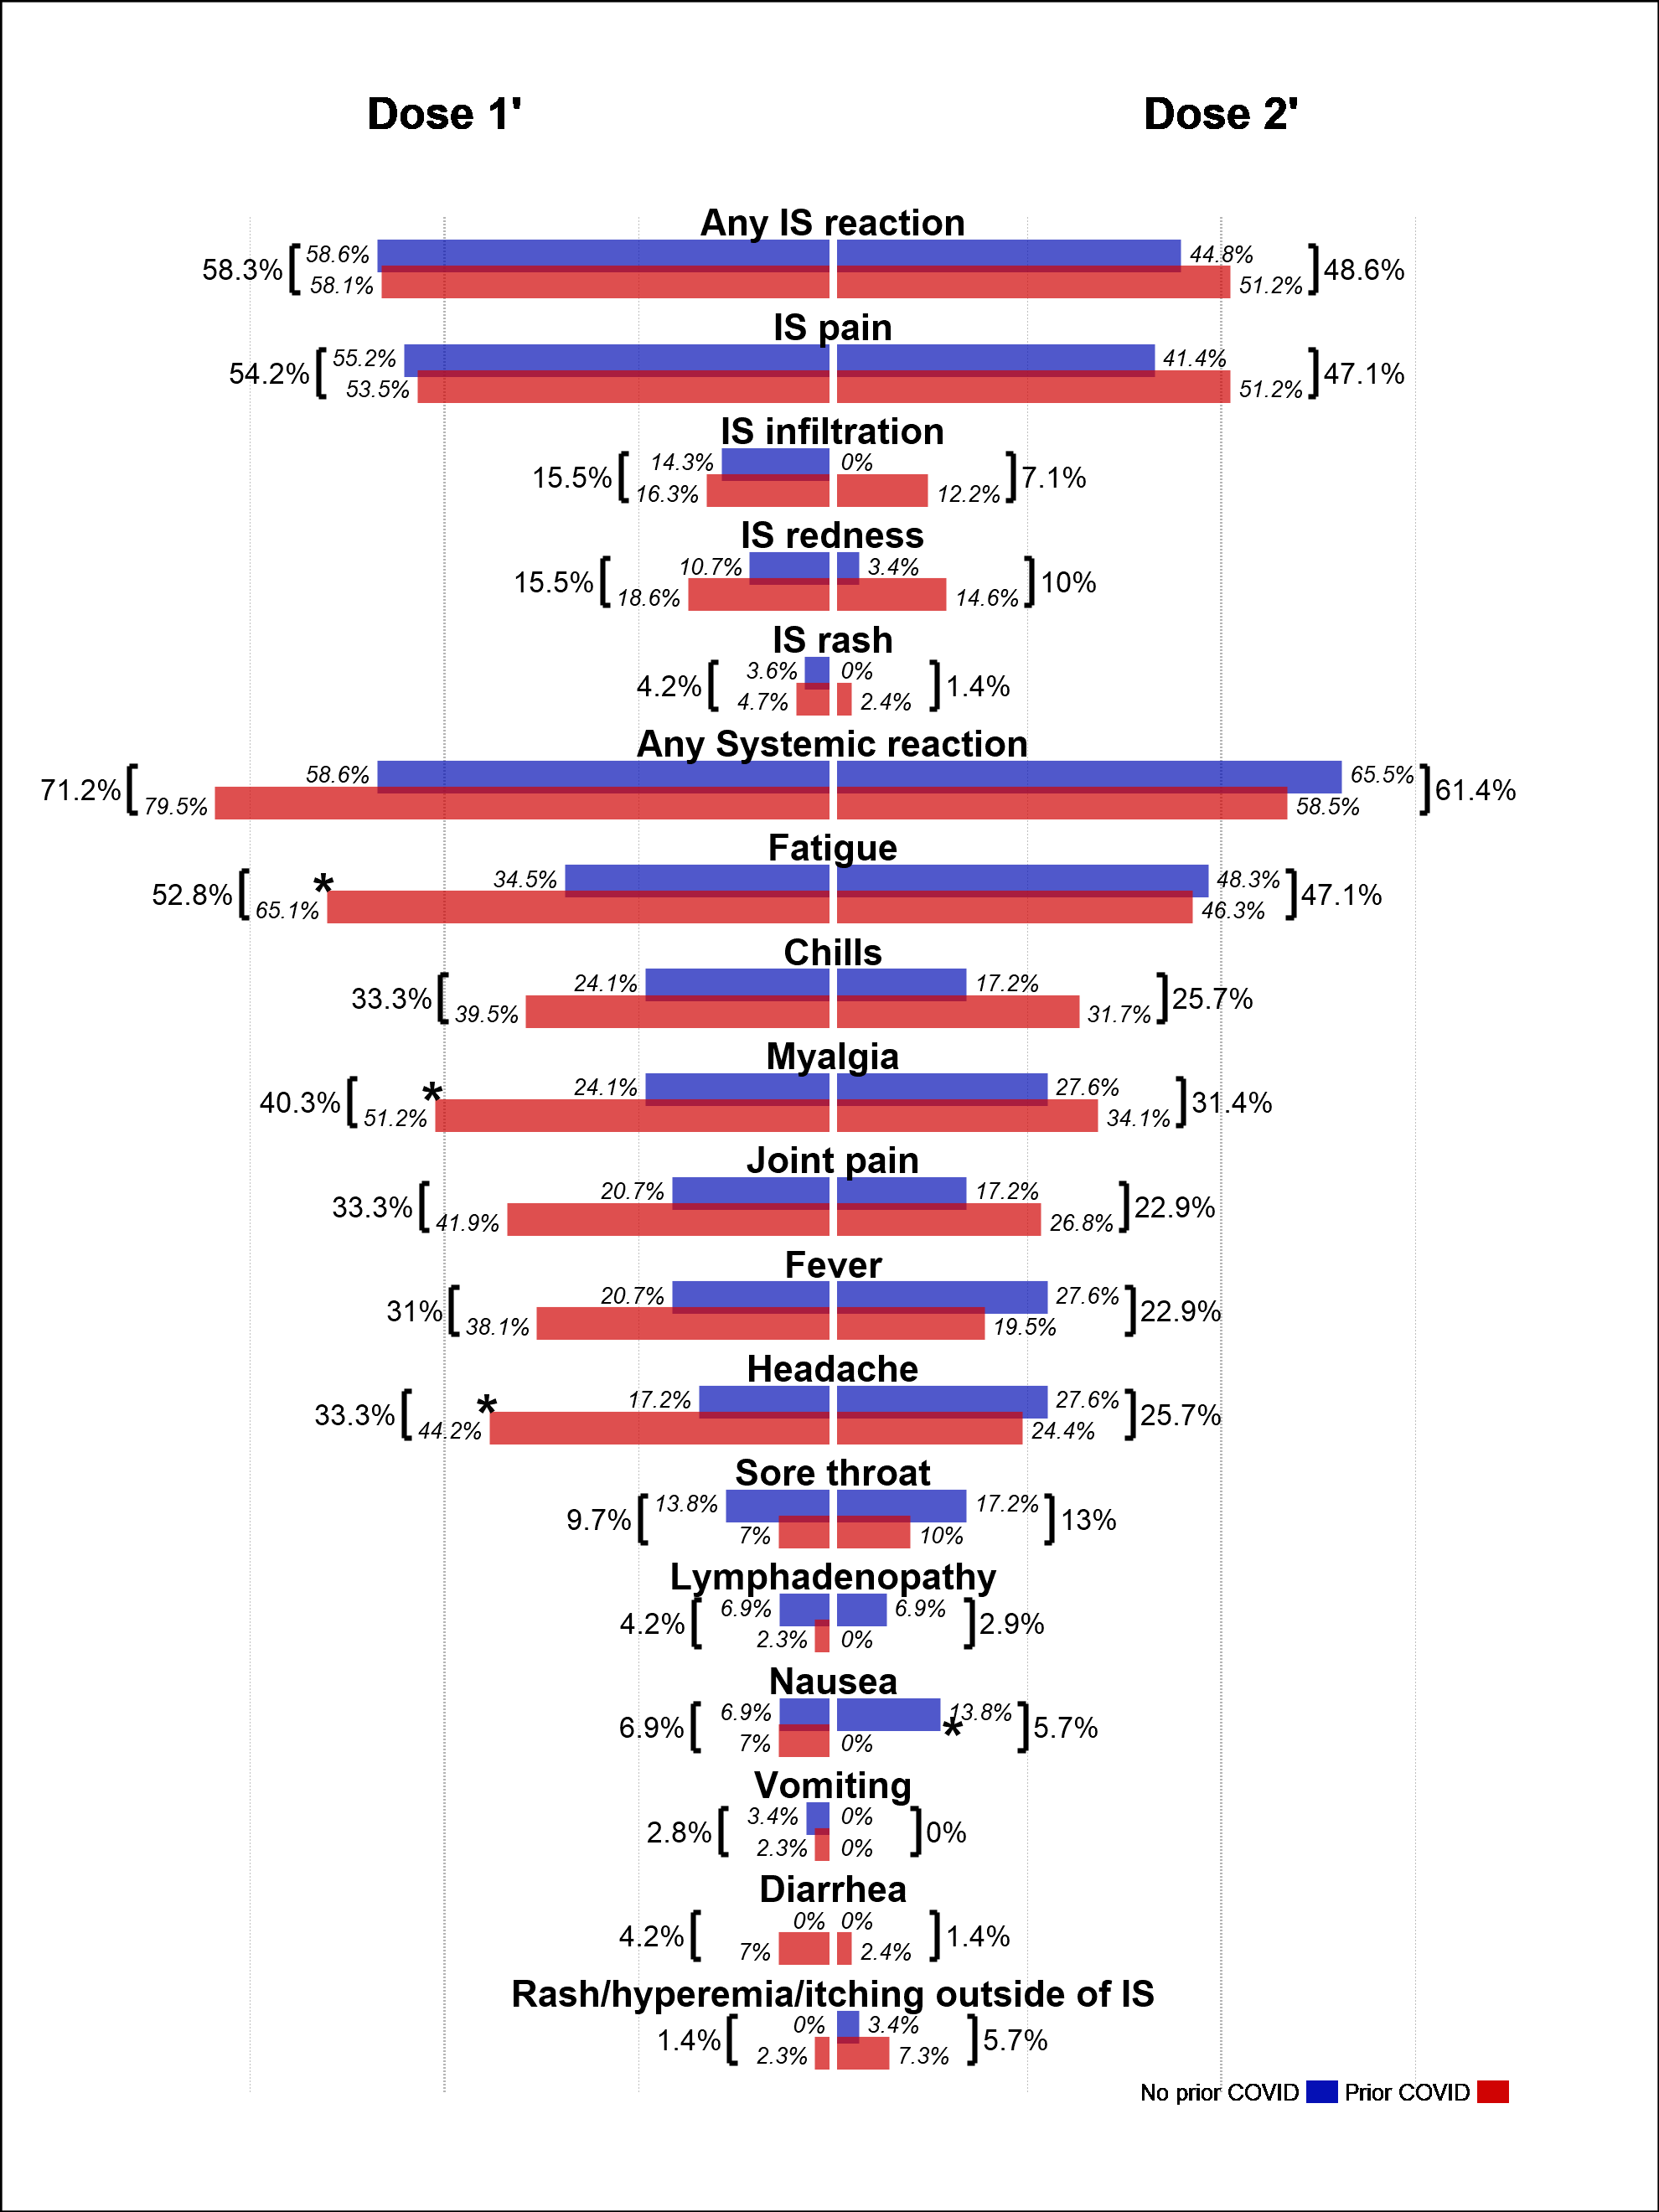

In [25]:
options(repr.plot.width = 9, repr.plot.height = 12, repr.plot.res = 220, warn = -1)

suppressWarnings({
  suppressMessages({

symptoms_plot <-
 symptoms_prop %>%
  ggplot() +
  # vertical line 50th
  geom_segment(aes(x = -50, xend = -50, y = 0, yend = 36), linetype = "dotted", size = 0.2, color = "grey70") + # nolint
  geom_segment(aes(x =  50, xend =  50, y = 0, yend = 36), linetype = "dotted", size = 0.2, color = "grey70") + # nolint
    # vertical line 25th
  geom_segment(aes(x = -25, xend = -25, y = 0, yend = 36), linetype = "dotted", size = 0.1, color = "grey75") + # nolint
  geom_segment(aes(x =  25, xend =  25, y = 0, yend = 36), linetype = "dotted", size = 0.1, color = "grey75") + # nolint
    # vertical line 75th
  geom_segment(aes(x = -75, xend = -75, y = 0, yend = 36), linetype = "dotted", size = 0.1, color = "grey75") + # nolint
  geom_segment(aes(x =  75, xend =  75, y = 0, yend = 36), linetype = "dotted", size = 0.1, color = "grey75") + # nolint
  # NO PRIOR BLUE
  geom_segment(aes(x = 0, xend =      `No prior 42d`, y = n + 0.25, yend = n + 0.25), size = 4.5, colour = "#0511b4", alpha = 0.7) + # nolint
  geom_segment(aes(x = 0, xend = -1 * `No prior 21d`, y = n + 0.25, yend = n + 0.25), size = 4.5, colour = "#0511b4", alpha = 0.7) + # nolint
    # PRIOR RED
  geom_segment(aes(x = 0, xend =      `Prior 42d`, y = n - 0.25, yend = n - 0.25), size = 4.5, colour = "#cf0404fd", alpha = 0.7) + # nolint
  geom_segment(aes(x = 0, xend = -1 * `Prior 21d`, y = n - 0.25, yend = n - 0.25), size = 4.5, colour = "#cf0404fd", alpha = 0.7) + # nolint
    # vertical line
  geom_segment(aes(x = 0, xend = 0, y = 0, yend = 36), linetype = "solid", size = 1, color = "white") + # nolint
    #SYMPTOMS
  geom_text(aes(x = 0, y = n + 0.9, label = SYMPTOMS, hjust = 0.5), fill = NA, label.color = NA, size = 5, fontface = "bold") + # nolint
    # PERCENT
  geom_text(aes(x =      `No prior 42d` + 1, y = n + 0.3, label = paste0(round(`No prior 42d`,2), "%"), hjust = 0), fill = NA, label.color = NA, size = 3, fontface = "italic") + # nolint
  geom_text(aes(x = -1 * `No prior 21d` - 1, y = n + 0.3, label = paste0(round(`No prior 21d`,2), "%"), hjust = 1), fill = NA, label.color = NA, size = 3, fontface = "italic") + # nolint

  geom_text(aes(x =      `Prior 42d` + 1,    y = n - 0.3, label = paste0(round(`Prior 42d`,2), "%"),    hjust = 0), fill = NA, label.color = NA, size = 3, fontface = "italic") + # nolint
  geom_text(aes(x = -1 * `Prior 21d` - 1,    y = n - 0.3, label = paste0(round(`Prior 21d`,2), "%"),    hjust = 1), fill = NA, label.color = NA, size = 3, fontface = "italic") + # nolint
  # PERCENT mean 21d
  geom_text(aes(x = -1 * pmax(`No prior 21d`, `Prior 21d`, `21d`, na.rm = T) - 12, y = n, label = paste0(`21d`, "%"), hjust = 1), fill = NA, label.color = NA, size = 4) + # nolint

  geom_segment(aes(x =   -1 * pmax(`No prior 21d`, `Prior 21d`, `21d`, na.rm = T) - 11,  # nolint
                  xend = -1 * pmax(`No prior 21d`, `Prior 21d`, `21d`, na.rm = T) - 11,  # nolint
                  y =    n - 0.45,
                  yend = n + 0.45),
              linetype = "solid", size = .7) +
  geom_segment(aes(x =   -1 * pmax(`No prior 21d`, `Prior 21d`, `21d`, na.rm = T) - 11,  # nolint
                  xend = -1 * pmax(`No prior 21d`, `Prior 21d`, `21d`, na.rm = T) - 10,  # nolint
                  y =    n - 0.45,
                  yend = n - 0.45),
              linetype = "solid", size = .7) +
  geom_segment(aes(x =   -1 * pmax(`No prior 21d`, `Prior 21d`, `21d`, na.rm = T) - 11,  # nolint
                  xend = -1 * pmax(`No prior 21d`, `Prior 21d`, `21d`, na.rm = T) - 10,  # nolint
                  y =    n + 0.45,
                  yend = n + 0.45),
              linetype = "solid", size = .7) +
   # PERCENT mean 42d
  geom_text(aes(x = pmax(`No prior 42d`, `Prior 42d`, `42d`, na.rm = T) + 12, y = n, label = paste0(`42d`, "%"), hjust = 0), fill = NA, label.color = NA, size = 4) + # nolint
  geom_segment(aes(x =   pmax(`No prior 42d`, `Prior 42d`, `42d`, na.rm = T) + 11,  # nolint
                  xend = pmax(`No prior 42d`, `Prior 42d`, `42d`, na.rm = T) + 11,  # nolint
                  y =    n - 0.45,
                  yend = n + 0.45),
              linetype = "solid", size = .7) +
  geom_segment(aes(x =   pmax(`No prior 42d`, `Prior 42d`, `42d`, na.rm = T) + 11,  # nolint
                  xend = pmax(`No prior 42d`, `Prior 42d`, `42d`, na.rm = T) + 10,  # nolint
                  y =    n - 0.45,
                  yend = n - 0.45),
              linetype = "solid", size = .7) +
  geom_segment(aes(x =   pmax(`No prior 42d`, `Prior 42d`, `42d`, na.rm = T) + 11,  # nolint
                  xend = pmax(`No prior 42d`, `Prior 42d`, `42d`, na.rm = T) + 10,  # nolint
                  y =    n + 0.45,
                  yend = n + 0.45),
              linetype = "solid", size = .7) +
  # SIGNIFICANT
  geom_text(data = symptoms_prop %>% filter(SYMPTOMS == "Fatigue"),
            mapping = aes(x = -67, y = n,   label = "*", hjust = 0), colour = "#050505", size = 8, fontface = "bold") + # nolint
  geom_text(data = symptoms_prop %>% filter(SYMPTOMS == "Myalgia"),
            mapping = aes(x = -53, y = n,   label = "*", hjust = 0), colour = "#050505", size = 8, fontface = "bold") + # nolint
  geom_text(data = symptoms_prop %>% filter(SYMPTOMS == "Headache"),
            mapping = aes(x = -46, y = n,   label = "*", hjust = 0), colour = "#050505", size = 8, fontface = "bold") + # nolint
  geom_text(data = symptoms_prop %>% filter(SYMPTOMS == "Nausea"),
            mapping = aes(x = 14, y = n-.2, label = "*", hjust = 0), colour = "#050505", size = 8, fontface = "bold") + # nolint
  # GROUP
  geom_text(aes(x = -40, y = 38, label = "Dose 1'", hjust = 1), size = 6, fontface = "bold")+ # nolint
  geom_text(aes(x =  40, y = 38, label = "Dose 2' ", hjust = 0), size = 6, fontface = "bold")+ # nolint
  # LEGEND
  geom_text(aes(x = 60, y = 0, label = "No prior COVID", hjust = 1), size = 3, fontface = "plain") + # nolint
  geom_segment(aes(x = 61, xend =  65, y = 0, yend = 0), size = 3, colour = "#0511b4", alpha = 0.7) + # nolint
  geom_text(aes(x = 82, y = 0, label = "Prior COVID", hjust = 1), size = 3, fontface = "plain")+ # nolint
  geom_segment(aes(x = 83, xend = 87, y = 0, yend = 0), size = 3, colour = "#cf0404fd", alpha = 0.7) + # nolint
theme_minimal() +
  theme(axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        legend.position = "none",
        panel.grid.major.y = element_blank(),
        panel.grid.minor.y = element_blank(),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        plot.background = element_rect(fill = "#ffffff")
        ) +
  scale_x_continuous(breaks = -95:95, limits = c(-95, 95))

 })
})
symptoms_plot

# Fig 3. Effects of Sputnik-V vaccination on blood and mucosal SARS-CoV-2 antibodies in all participants

Data preparation

In [26]:
db_ig <-
 db_all %>%
  select(2, 44:58)

In [28]:
# IgG
igg <-
 db_ig %>%
  select(1, 5:7) %>%
   pivot_longer(-`PRIOR COVID`,
                names_to = "Var", 
                values_to = "Val") %>%
    mutate(Group = factor(paste(`PRIOR COVID`, Var),
                   levels = c("No prior COVID IgG_V1", "No prior COVID IgG_V2", "No prior COVID IgG_V3", # nolint
                              "Prior COVID IgG_V1",    "Prior COVID IgG_V2",    "Prior COVID IgG_V3"), # nolint
                   labels = c("Baseline",  "1' Dose",  "2' Dose",
                              "Baseline.", "1' Dose.", "2' Dose."))) %>%
     mutate(Val = log10(Val))
# IgA
iga <-
 db_ig %>%
  select(1:4) %>%
  pivot_longer(-`PRIOR COVID`,
               names_to = "Var",
               values_to = "Val") %>%
   mutate(Group = factor(paste(`PRIOR COVID`, Var),
                  levels = c("No prior COVID IgA_V1", "No prior COVID IgA_V2", "No prior COVID IgA_V3", # nolint
                             "Prior COVID IgA_V1",    "Prior COVID IgA_V2",    "Prior COVID IgA_V3"), # nolint
                  labels = c("Baseline",  "1' Dose",  "2' Dose",
                             "Baseline.", "1' Dose.", "2' Dose."))) %>%
         mutate(Val = log10(Val))

# IgNeut
ign <-
 db_ig %>%
  select(1, 8:10) %>%
   pivot_longer(-`PRIOR COVID`,
                names_to = "Var",
                values_to = "Val") %>%
  mutate(Group = factor(paste(`PRIOR COVID`, Var),
                 levels = c("No prior COVID NeutPRCNT_V1", "No prior COVID NeutPRCNT_V2", "No prior COVID NeutPRCNT_V3", # nolint
                            "Prior COVID NeutPRCNT_V1",    "Prior COVID NeutPRCNT_V2",    "Prior COVID NeutPRCNT_V3"), # nolint
                 labels = c("Baseline",  "1' Dose",  "2' Dose",
                            "Baseline.", "1' Dose.", "2' Dose.")))

# IgG mucosal
iggm <-
 db_ig %>%
  select(1, 11:13) %>%
   pivot_longer(-`PRIOR COVID`,
                names_to = "Var",
                values_to = "Val") %>%
    mutate(Group = factor(paste(`PRIOR COVID`, Var),
                   levels = c("No prior COVID NsIgG_V1", "No prior COVID NsIgG_V2", "No prior COVID NsIgG_V3", # nolint
                              "Prior COVID NsIgG_V1",    "Prior COVID NsIgG_V2",    "Prior COVID NsIgG_V3"), # nolint
                   labels = c("Baseline",  "1' Dose",  "2' Dose",
                              "Baseline.", "1' Dose.", "2' Dose.")))

# IgA mucosal
igam <-
 db_ig %>%
  select(1, 14:16) %>%
   pivot_longer(-`PRIOR COVID`,
                names_to = "Var",
                values_to = "Val") %>%
    mutate(Group = factor(paste(`PRIOR COVID`, Var),
                   levels = c("No prior COVID NsIgA_V1", "No prior COVID NsIgA_V2", "No prior COVID NsIgA_V3", # nolint
                              "Prior COVID NsIgA_V1",    "Prior COVID NsIgA_V2",    "Prior COVID NsIgA_V3"), # nolint
                   labels = c("Baseline",  "1' Dose",  "2' Dose",
                              "Baseline.", "1' Dose.", "2' Dose.")))
# Ratio IgG's
ratio_igg <-
 db_ig %>%
  select(1,7, 5, 13, 11) %>%
   mutate(blood_ratio = (IgG_V3 / IgG_V1) %>% log2(),
          nasal_ratio = (NsIgG_V3 / NsIgG_V1) %>% log2()) %>% # nolint
    select(-c(2:5))

# Ratio IgA's
ratio_iga <-
 db_ig %>%
  select(1, 4, 2, 16, 14) %>%
   mutate(blood_ratio = (IgA_V3 / IgA_V1) %>% log2(),
          nasal_ratio = (NsIgA_V3 / NsIgA_V1) %>% log2()) %>% # nolint
    select(-c(2:5))

In [29]:
suppressWarnings({
  suppressMessages({

p_igg_t <-
igg %>%
  mutate(Group = factor(str_remove(Group, pattern = "\\."),
                 levels = c("Baseline", "1' Dose", "2' Dose"))) %>%
   ggplot(aes(x = Group, y = Val)) +
   ggbeeswarm::geom_beeswarm(aes(fill = Group),
                             dodge.width = 0.9,
                             shape = 21,
                             cex = 1.4,
                             alpha = 0.7) +
   geom_signif(comparisons = list(c("Baseline", "1' Dose"),
                                  c("1' Dose", "2' Dose"),
                                  c("Baseline", "2' Dose")),
                map_signif_level = function(p) ifelse(p < 0.001, "p<0.001", paste0("p=", round(p, 3))), # nolint
                test = "wilcox.test",
                step_increase = .07,
                textsize = 2.5) +
   stat_summary(fun.data = median_IQR,
                colour = "gray10",
                size = 0.45,
                alpha = 0.6,
                position = position_nudge(x = -0.3)) +
   theme_prism(base_fontface = "plain",
               base_line_size = 0.6,
               base_family = "") +
   scale_x_discrete(guide = guide_prism_bracket(width = 0.10),
                    labels = c("Baseline", "1' Dose", "2' Dose")) + # nolint
   labs(title = "Blood anti-Spike IgG",
        y = expression(paste("OD450 ratio (", log[10], ")"))) +
   ylim(-1, 2.5) +
   scale_fill_manual(values = c("#0511b4", "#cf0404fd", "#6d0c0c")) +
   theme(plot.title = element_text(color = "black",
                      size = 14,
                      face = "bold"),
         legend.position = "none",
         axis.title.x = element_blank(),
         axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 8),
         strip.text = element_blank(),
         legend.spacing.x = unit(0, "pt"),
         legend.text = element_text(margin = margin(r = 20))
       )

p_iga_t <-
iga %>%
  mutate(Group = factor(str_remove(Group, pattern = "\\."),
                 levels = c("Baseline", "1' Dose", "2' Dose"))) %>%
   ggplot(aes(x = Group, y = Val)) +
   ggbeeswarm::geom_beeswarm(aes(fill = Group),
                             dodge.width = 0.9,
                             shape = 21,
                             cex = 1.4,
                             alpha = 0.7) +
   geom_signif(comparisons = list(c("Baseline", "1' Dose"),
                                  c("1' Dose", "2' Dose"),
                                  c("Baseline", "2' Dose")),
                map_signif_level = function(p) ifelse(p < 0.001, "p<0.001", paste0("p=", round(p, 3))), # nolint
                test = "wilcox.test",
                step_increase = .07,
                textsize = 2.5) +
   stat_summary(fun.data = median_IQR,
                colour = "gray10",
                size = 0.45,
                alpha = 0.6,
                position = position_nudge(x = -0.3)) +
   theme_prism(base_fontface = "plain",
               base_line_size = 0.6,
               base_family = "") +
   scale_x_discrete(guide = guide_prism_bracket(width = 0.10),
                    labels = c("Baseline", "1' Dose", "2' Dose")) + # nolint
   labs(title = "Blood anti-Spike IgA",
        y = expression(paste("OD450 ratio (", log[10], ")"))) +
   ylim(-1, 2.5) +
   scale_fill_manual(values = c("#0511b4", "#cf0404fd", "#6d0c0c")) +
   theme(plot.title = element_text(color = "black",
                      size = 14,
                      face = "bold"),
         legend.position = "none",
         axis.title.x = element_blank(),
         axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 8),
         strip.text = element_blank(),
         legend.spacing.x = unit(0, "pt"),
         legend.text = element_text(margin = margin(r = 20))
       )

p_ign_t <-
 ign %>%
 mutate(Group = factor(str_remove(Group, pattern = "\\."),
                 levels = c("Baseline", "1' Dose", "2' Dose"))) %>%
  ggplot(aes(x = Group, y = Val)) +
  ggbeeswarm::geom_beeswarm(aes(fill = Group),
                            dodge.width = 0.9,
                            shape = 21,
                            cex = 1.4,
                            alpha = 0.7) +
   geom_signif(comparisons = list(c("Baseline", "1' Dose"),
                                  c("1' Dose", "2' Dose"),
                                  c("Baseline", "2' Dose")),
               map_signif_level = function(p) ifelse(p < 0.001, "p<0.001", paste0("p=", round(p, 3))), # nolint
               test = "wilcox.test",
               step_increase = .07,
               textsize = 2.5) +
  stat_summary(fun.data = median_IQR,
               colour = "gray10",
               size = 0.45,
               alpha = 0.6,
               position = position_nudge(x = -0.3)) +
  theme_prism(base_fontface = "plain",
              base_line_size = 0.6,
              base_family = "") +
  scale_x_discrete(guide = guide_prism_bracket(width = 0.10),
                   labels = c("Baseline", "1' Dose", "2' Dose")) + # nolint
  labs(title = 'SARS-CoV-2 neutralization', # nolint
       y = "Neutralization (%)") +
  ylim(0, 150) +
  scale_fill_manual(values = c("#0511b4", "#cf0404fd", "#6d0c0c")) +
  theme(plot.title = element_text(color = "black",
                     size = 14,
                     face = "bold"),
        legend.position = "none",
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 8),
        strip.text = element_blank(),
        legend.spacing.x = unit(0, "pt"),
        legend.text = element_text(margin = margin(r = 20))
      )

p_iggm_t <-
 iggm %>%
  mutate(Group = factor(str_remove(Group, pattern = "\\."),
                 levels = c("Baseline", "1' Dose", "2' Dose"))) %>%
  ggplot(aes(x = Group, y = Val)) +
  ggbeeswarm::geom_beeswarm(aes(fill = Group),
                            dodge.width = 0.9,
                            shape = 21,
                            cex = 1.4,
                            alpha = 0.7) +
  geom_signif(comparisons = list(c("Baseline", "1' Dose"),
                                  c("1' Dose", "2' Dose"),
                                  c("Baseline", "2' Dose")),
               map_signif_level = function(p) ifelse(p < 0.001, "p<0.001", paste0("p=", round(p, 3))), # nolint
               test = "wilcox.test",
               step_increase = .07,
               textsize = 2.5) +
  stat_summary(fun.data = median_IQR,
               colour = "gray10",
               size = 0.45,
               alpha = 0.6,
               position = position_nudge(x = -0.3)) +
  theme_prism(base_fontface = "plain",
              base_line_size = 0.6,
              base_family = "") +
  scale_x_discrete(guide = guide_prism_bracket(width = 0.10),
                   labels = c("Baseline", "1' Dose", "2' Dose")) + # nolint
  labs(title = 'Mucosal anti-Spike IgG', # nolint
       y = "OD450 ratio") +
#  ylim(0, 150) +
  scale_fill_manual(values = c("#0511b4", "#cf0404fd", "#6d0c0c")) +
  theme(plot.title = element_text(color = "black",
                     size = 14,
                     face = "bold"),
        legend.position = "none",
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 8),
        strip.text = element_blank(),
        legend.spacing.x = unit(0, "pt"),
        legend.text = element_text(margin = margin(r = 20))
      )

p_igam_t <-
 igam %>%
  mutate(Group = factor(str_remove(Group, pattern = "\\."),
                 levels = c("Baseline", "1' Dose", "2' Dose"))) %>%
  ggplot(aes(x = Group, y = Val)) +
  ggbeeswarm::geom_beeswarm(aes(fill = Group),
                            dodge.width = 0.9,
                            shape = 21,
                            cex = 1.4,
                            alpha = 0.7) +
  geom_signif(comparisons = list(c("Baseline", "1' Dose"),
                                  c("1' Dose", "2' Dose"),
                                  c("Baseline", "2' Dose")),
               map_signif_level = function(p) ifelse(p < 0.001, "p<0.001", paste0("p=", round(p, 3))), # nolint
               test = "wilcox.test",
               step_increase = .07,
               textsize = 2.5) +
  stat_summary(fun.data = median_IQR,
               colour = "gray10",
               size = 0.45,
               alpha = 0.6,
               position = position_nudge(x = -0.3)) +
  theme_prism(base_fontface = "plain",
              base_line_size = 0.6,
              base_family = "") +
  scale_x_discrete(guide = guide_prism_bracket(width = 0.10),
                   labels = c("Baseline", "1' Dose", "2' Dose")) + # nolint
  labs(title = 'Mucosal anti-Spike IgA', # nolint
       y = "OD450 ratio") +
  scale_fill_manual(values = c("#0511b4", "#cf0404fd", "#6d0c0c")) +
  theme(plot.title = element_text(color = "black",
                     size = 14,
                     face = "bold"),
        legend.position = "bottom",
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 8),
        strip.text = element_blank(),
        legend.spacing.x = unit(0, "pt"),
        legend.text = element_text(margin = margin(r = 20))
      ) +
   guides(fill = guide_legend(override.aes = list(size = 6)))

p_corr_igg_t <-
 ratio_igg %>%
  ggplot(aes(x = blood_ratio, y = nasal_ratio)) +
  geom_point(fill = "#64645e", shape = 21, colour = "black", size = 2.5, stroke = .1, alpha = 0.7) + #nolint
  geom_hline(yintercept = 0, linetype = 2, size = 0.3) +
  theme_prism(base_fontface = "plain",
              base_line_size = 0.6,
              base_family = "") +
   labs(title = "Blood vs. mucosal ab boost",
        x = expression(paste(Delta, " blood IgG")),
        y = expression(paste(Delta, " mucosal IgG"))) +
   annotate(geom = "text", x = -5, y = 10, color = "black", hjust = 0, size = 2.2, # nolint
            label = statsExpressions::corr_test(ratio_igg,
                                                 blood_ratio,
                                                 nasal_ratio,
                                                 type = "nonparametric")$expression[[1]]) + #nolint
   ylim(-5, 10) +
   xlim(-5, 8) +
   theme(plot.title = element_text(color = "black", size = 14, face = "bold"),
         legend.position = "none",
         plot.subtitle = element_text(hjust = 1, size = 7))

p_corr_iga_t <-
 ratio_iga %>%
  ggplot(aes(x = blood_ratio, y = nasal_ratio)) +
  geom_point(fill = "#64645e", shape = 21, colour = "black", size = 2.5, stroke = .1, alpha = 0.7) + #nolint
  geom_hline(yintercept = 0, linetype = 2, size = 0.3) +
  theme_prism(base_fontface = "plain",
              base_line_size = 0.6,
              base_family = "") +
   labs(title = "Blood vs. mucosal ab boost",
        x = expression(paste(Delta, " blood IgA")),
        y = expression(paste(Delta, " mucosal IgA"))) +
   annotate(geom = "text", x = -5, y = 10, color = "black", hjust = 0, size = 2.2, # nolint
            label = statsExpressions::corr_test(ratio_iga,
                                                 blood_ratio,
                                                 nasal_ratio,
                                                 type = "nonparametric")$expression[[1]]) + #nolint
   ylim(-5, 10) +
   xlim(-5, 8) +
   theme(plot.title = element_blank(),
         legend.position = "none",
         plot.subtitle = element_text(hjust = 1, size = 7)) +
   plot_layout(tag_level = "new")

p_corr_t <- p_corr_igg_t + p_corr_iga_t + plot_layout(ncol = 1)

  })
})

**Fig 3**
- A) Blood Spike-reactive IgG titers at baseline and after vaccination. 
- B) Blood Spike-reactive IgA titers at baseline and after vaccination. In A, B: n=73 and 70 for baseline/Dose 1' and Dose 2', respectively. 
- C) SARS-CoV-2 neutralization at baseline and after vaccination (n=54 for all timepoints). 
- D) Mucosal Spike-reactive IgG titers at baseline and after vaccination (n=59 for all timepoints). 
- E) Mucosal Spike-reactive IgA titers at baseline and after vaccination (n=59 for all timepoints). 
- F) Correlation plots of mucosal and blood IgG (top) and IgA (bottom) log2-transformed post-Dose 2’/baseline titer ratios. 

The Spearman coefficients (r) and their statistical significance (p) are shown. In panels A-E: brackets represent geometric means and 95% confidence intervals; p values indicate the statistical significance assessed by the Mann-Whitney U test.

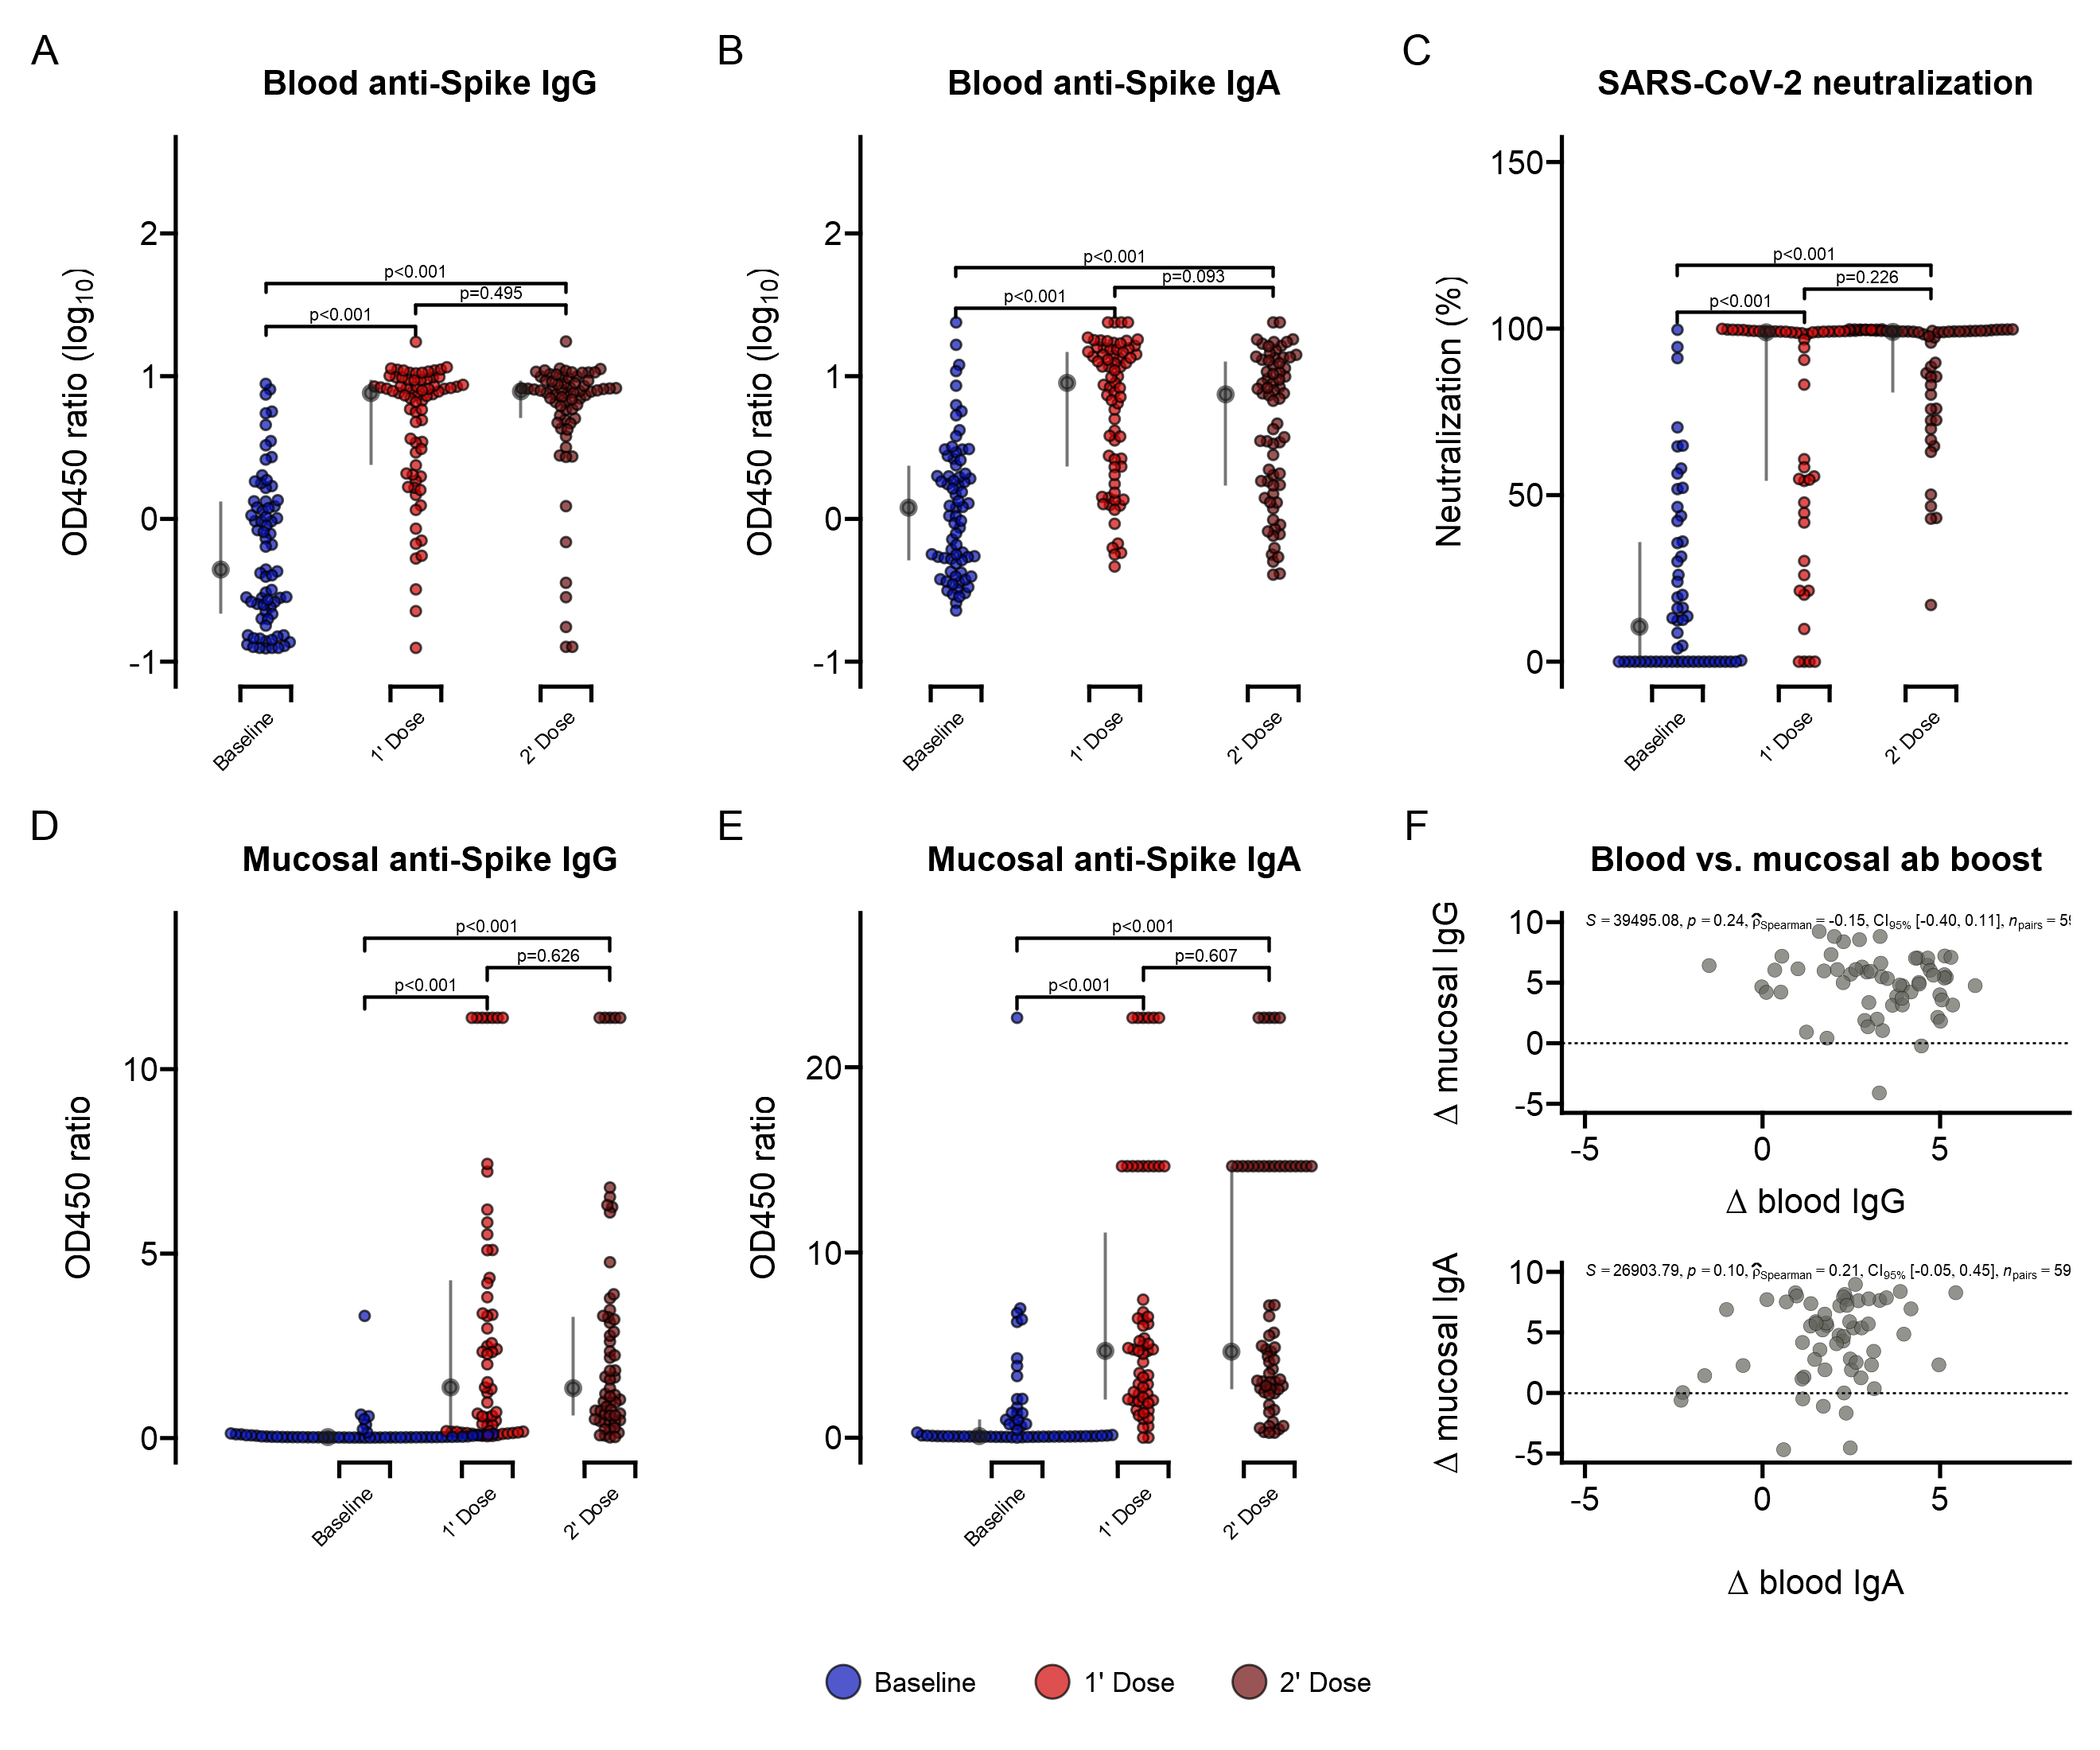

In [31]:
options(repr.plot.res = 220, repr.plot.width = 12, repr.plot.height = 10, warn = -1)

suppressWarnings({
  suppressMessages({
gg_fig <-
 p_igg_t + p_iga_t + p_ign_t + p_iggm_t + p_igam_t + p_corr_t +
  plot_layout(ncol = 3) +
  plot_annotation(tag_levels = "A")

  })
})
gg_fig

# Fig 4. Effects of Sputnik-V vaccination on blood and mucosal SARS-CoV-2 antibodies in participants stratified by prior exposure to COVID-19

Separeted plots

In [32]:
p_igg <-
 igg %>%
  ggplot(aes(x = Group, y = Val)) +
  ggbeeswarm::geom_beeswarm(aes(fill = `PRIOR COVID`),
                            dodge.width = 0.9,
                            shape = 21,
                            cex = 1.4,
                            alpha = 0.7) +
  geom_signif(comparisons = list(c("Baseline", "1' Dose"),
                                 c("Baseline.", "1' Dose."),
                                 c("1' Dose", "2' Dose"),
                                 c("1' Dose.", "2' Dose."),
                                 c("Baseline.", "2' Dose."),
                                 c("Baseline", "2' Dose"),
                                 c("2' Dose", "1' Dose.")),
               map_signif_level = function(p) ifelse(p < 0.001, "p<0.001", paste0("p=", round(p, 3))), # nolint
               test = "wilcox.test",
               step_increase = .07,
               textsize = 2.5) +
  geom_hline(yintercept = log10(0.8), linetype = 2, size = 0.3) +
  stat_summary(fun.data = median_IQR,
               colour = "gray10",
               size = 0.45,
               alpha = 0.6,
               position = position_nudge(x = -0.3)) +
  theme_prism(base_fontface = "plain",
              base_line_size = 0.6,
              base_family = "") +
  scale_x_discrete(guide = guide_prism_bracket(width = 0.10),
                   labels = rep(c("Baseline", "1' Dose", "2' Dose"), 2)) + # nolint
  labs(title = "Blood anti-Spike IgG",
       y = expression(paste("OD450 ratio (", log[10], ")"))) +
  ylim(-1, 2.5) +
  scale_fill_manual(values = c("#0511b4", "#cf0404fd")) +
  theme(plot.title = element_text(color = "black",
                     size = 14,
                     face = "bold"),
        legend.position = "none",
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 8),
        strip.text = element_blank(),
        legend.spacing.x = unit(0, "pt"),
        legend.text = element_text(margin = margin(r = 20))
      )


p_iga <-
 iga %>%
  ggplot(aes(x = Group, y = Val)) +
  ggbeeswarm::geom_beeswarm(aes(fill = `PRIOR COVID`),
                            dodge.width = 0.9,
                            shape = 21,
                            cex = 1.4,
                            alpha = 0.7) +
  geom_signif(comparisons = list(c("Baseline", "1' Dose"),
                                 c("Baseline.", "1' Dose."),
                                 c("1' Dose", "2' Dose"),
                                 c("1' Dose.", "2' Dose."),
                                 c("Baseline.", "2' Dose."),
                                 c("Baseline", "2' Dose"),
                                 c("2' Dose", "1' Dose.")),
               map_signif_level = function(p) ifelse(p < 0.001, "p<0.001", paste0("p=", round(p, 3))), # nolint
               test = "wilcox.test",
               step_increase = .07,
               textsize = 2.5) +
  geom_hline(yintercept = log10(0.8), linetype = 2, size = 0.3) +
  stat_summary(fun.data = median_IQR,
               colour = "gray10",
               size = 0.45,
               alpha = 0.6,
               position = position_nudge(x = -0.3)) +
  theme_prism(base_fontface = "plain",
              base_line_size = 0.6,
              base_family = "") +
  scale_x_discrete(guide = guide_prism_bracket(width = 0.10),
                   labels = rep(c("Baseline", "1' Dose", "2' Dose"), 2)) + # nolint
  labs(title = "Blood anti-Spike IgA",
       y = expression(paste("OD450 ratio (", log[10], ")"))) +
  ylim(-1, 2.5) +
  scale_fill_manual(values = c("#0511b4", "#cf0404fd")) +
  theme(plot.title = element_text(color = "black",
                     size = 14,
                     face = "bold"),
        legend.position = "none",
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 8),
        strip.text = element_blank(),
        legend.spacing.x = unit(0, "pt"),
        legend.text = element_text(margin = margin(r = 20))
      )

p_ign <-
 ign %>%
  ggplot(aes(x = Group, y = Val)) +
  ggbeeswarm::geom_beeswarm(aes(fill = `PRIOR COVID`),
                            dodge.width = 0.9,
                            shape = 21,
                            cex = 1.4,
                            alpha = 0.7) +
  geom_signif(comparisons = list(c("Baseline", "1' Dose"),
                                 c("Baseline.", "1' Dose."),
                                 c("1' Dose", "2' Dose"),
                                 c("1' Dose.", "2' Dose."),
                                 c("Baseline.", "2' Dose."),
                                 c("Baseline", "2' Dose"),
                                 c("2' Dose", "1' Dose.")),
               map_signif_level = function(p) ifelse(p < 0.001, "p<0.001", paste0("p=", round(p, 3))), # nolint
               test = "wilcox.test",
               step_increase = .07,
               textsize = 2.5) +
  geom_hline(yintercept = 30, linetype = 2, size = 0.3) +
  stat_summary(fun.data = median_IQR,
               colour = "gray10",
               size = 0.45,
               alpha = 0.6,
               position = position_nudge(x = -0.3)) +
  theme_prism(base_fontface = "plain",
              base_line_size = 0.6,
              base_family = "") +
  scale_x_discrete(guide = guide_prism_bracket(width = 0.10),
                   labels = rep(c("Baseline", "1' Dose", "2' Dose"), 2)) + # nolint
  labs(title = 'SARS-CoV-2 neutralization', # nolint
       y = "Neutralization (%)") +
  ylim(0, 150) +
  scale_fill_manual(values = c("#0511b4", "#cf0404fd")) +
  theme(plot.title = element_text(color = "black",
                     size = 14,
                     face = "bold"),
        legend.position = "none",
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 8),
        strip.text = element_blank(),
        legend.spacing.x = unit(0, "pt"),
        legend.text = element_text(margin = margin(r = 20))
      )

p_iggm <-
 iggm %>%
  ggplot(aes(x = Group, y = Val)) +
  ggbeeswarm::geom_beeswarm(aes(fill = `PRIOR COVID`),
                            dodge.width = 0.9,
                            shape = 21,
                            cex = 1.4,
                            alpha = 0.7) +
  geom_signif(comparisons = list(c("Baseline", "1' Dose"),
                                 c("Baseline.", "1' Dose."),
                                 c("1' Dose", "2' Dose"),
                                 c("1' Dose.", "2' Dose."),
                                 c("Baseline.", "2' Dose."),
                                 c("Baseline", "2' Dose"),
                                 c("2' Dose", "1' Dose.")),
               map_signif_level = function(p) ifelse(p < 0.001, "p<0.001", paste0("p=", round(p, 3))), # nolint
               test = "wilcox.test",
               step_increase = .07,
               textsize = 2.5) +
  geom_hline(yintercept = 0.11, linetype = 2, size = 0.3) +
  stat_summary(fun.data = median_IQR,
               colour = "gray10",
               size = 0.45,
               alpha = 0.6,
               position = position_nudge(x = -0.3)) +
  theme_prism(base_fontface = "plain",
              base_line_size = 0.6,
              base_family = "") +
  scale_x_discrete(guide = guide_prism_bracket(width = 0.10),
                   labels = rep(c("Baseline", "1' Dose", "2' Dose"), 2)) + # nolint
  labs(title = 'Mucosal anti-Spike IgG', # nolint
       y = "OD450 ratio") +
#  ylim(0, 150) +
  scale_fill_manual(values = c("#0511b4", "#cf0404fd")) +
  theme(plot.title = element_text(color = "black",
                     size = 14,
                     face = "bold"),
        legend.position = "none",
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 8),
        strip.text = element_blank(),
        legend.spacing.x = unit(0, "pt"),
        legend.text = element_text(margin = margin(r = 20))
      )

p_igam <-
 igam %>%
  ggplot(aes(x = Group, y = Val)) +
  ggbeeswarm::geom_beeswarm(aes(fill = `PRIOR COVID`),
                            dodge.width = 0.9,
                            shape = 21,
                            cex = 1.4,
                            alpha = 0.7) +
  geom_signif(comparisons = list(c("Baseline", "1' Dose"),
                                 c("Baseline.", "1' Dose."),
                                 c("1' Dose", "2' Dose"),
                                 c("1' Dose.", "2' Dose."),
                                 c("Baseline.", "2' Dose."),
                                 c("Baseline", "2' Dose"),
                                 c("2' Dose", "1' Dose.")),
               map_signif_level = function(p) ifelse(p < 0.001, "p<0.001", paste0("p=", round(p, 3))), # nolint
               test = "wilcox.test",
               step_increase = .07,
               textsize = 2.5) +
  geom_hline(yintercept = 3.03, linetype = 2, size = 0.3) +
  stat_summary(fun.data = median_IQR,
               colour = "gray10",
               size = 0.45,
               alpha = 0.6,
               position = position_nudge(x = -0.3)) +
  theme_prism(base_fontface = "plain",
              base_line_size = 0.6,
              base_family = "") +
  scale_x_discrete(guide = guide_prism_bracket(width = 0.10),
                   labels = rep(c("Baseline", "1' Dose", "2' Dose"), 2)) + # nolint
  labs(title = 'Mucosal anti-Spike IgA', # nolint
       y = "OD450 ratio") +
#  ylim(0, 150) +
  scale_fill_manual(values = c("#0511b4", "#cf0404fd")) +
  theme(plot.title = element_text(color = "black",
                     size = 14,
                     face = "bold"),
        legend.position = "bottom",
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 8),
        strip.text = element_blank(),
        legend.spacing.x = unit(0, "pt"),
        legend.text = element_text(margin = margin(r = 20))
      ) +
   guides(fill = guide_legend(override.aes = list(size = 6)))

p_corr_igg <-
 ratio_igg %>%
  ggplot(aes(x = blood_ratio, y = nasal_ratio)) +
  geom_point(aes(fill = `PRIOR COVID`, alpha = 0.7), shape = 21, colour = "black", size = 2.5, stroke = .1) + # nolint
  geom_hline(yintercept = 0, linetype = 2, size = 0.3) +
  theme_prism(base_fontface = "plain",
              base_line_size = 0.6,
              base_family = "") +
  labs(title = "Blood vs. mucosal ab boost",
       x = expression(paste(Delta, " blood IgG")),
       y = expression(paste(Delta, " mucosal IgG"))) +
  annotate(geom = "text", x = -5, y = 11, color = "#0511b4", hjust = 0, size = 2.2, # nolint
           label = statsExpressions::corr_test(ratio_igg %>%
                                               filter(`PRIOR COVID` == "No prior COVID"), # nolint
                                               blood_ratio,
                                               nasal_ratio,
                                               type = "nonparametric")$expression[[1]]) + # nolint
  annotate(geom = "text", x = -5, y = 9, color="#cf0404fd", hjust = 0, size = 2.2, # nolint
           label = statsExpressions::corr_test(ratio_igg %>%
                                               filter(`PRIOR COVID` == "Prior COVID"), # nolint
                                               blood_ratio,
                                               nasal_ratio,
                                               type = "nonparametric")$expression[[1]]) + # nolint
  ylim(-5, 11) +
  xlim(-5, 7) +
  scale_fill_manual(values = c("#0511b4", "#cf0404fd")) +
  theme(plot.title = element_text(color = "black", size = 14, face = "bold"),
        legend.position = "none")


p_corr_iga <-
 ratio_iga %>%
  ggplot(aes(x = blood_ratio, y = nasal_ratio)) +
  geom_point(aes(fill = `PRIOR COVID`, alpha = 0.7), shape = 21, colour = "black", size = 2.5, stroke = .1) + # nolint
  geom_hline(yintercept = 0, linetype = 2, size = 0.3) +
  theme_prism(base_fontface = "plain",
              base_line_size = 0.6,
              base_family = "") +
  labs(x = expression(paste(Delta, " blood IgA")),
       y = expression(paste(Delta, " mucosal IgA"))) +
  annotate(geom = "text", x = -5, y = 11, color = "#0511b4", hjust = 0, size = 2.2, # nolint
           label = statsExpressions::corr_test(ratio_iga %>%
                                               filter(`PRIOR COVID` == "No prior COVID"), # nolint
                                               blood_ratio,
                                               nasal_ratio,
                                           type = "nonparametric")$expression[[1]]) + # nolint
  annotate(geom = "text", x = -5, y = 9,   color = "#cf0404fd", hjust = 0, size = 2.2, # nolint
           label = statsExpressions::corr_test(ratio_iga %>%
                                               filter(`PRIOR COVID` == "Prior COVID"), # nolint
                                               blood_ratio,
                                               nasal_ratio,
                                               type = "nonparametric")$expression[[1]]) + # nolint
  ylim(-5, 11) +
  xlim(-5, 7.5) +
  scale_fill_manual(values = c("#0511b4", "#cf0404fd")) +
  theme(plot.title = element_blank(),
        legend.position = "none",
        plot.subtitle = element_text(hjust = 1, size = 7)) +
  plot_layout(tag_level = "new")

p_corr <- p_corr_igg + p_corr_iga + plot_layout(ncol = 1)

**Fig 4.**
- A) Blood Spike-reactive IgG titers at baseline and after vaccination. 
- B) Blood Spike-reactive IgA titers at baseline and after vaccination. In A, B: n=73 and 70 for baseline/Dose 1' and Dose 2', respectively. 
- C) SARS-CoV-2 neutralization at baseline and after vaccination. 
- D) Mucosal Spike-reactive IgG titers at baseline and after vaccination. 
- E) Mucosal Spike-reactive IgA titers at baseline and after vaccination. 
     In D and E, for all time points, n=22 and 37 for the No Prior and Prior COVID groups, respectively. 
- F) Correlation plots of mucosal and blood IgG (top) and IgA (bottom) log2-transformed post-Dose 2’/baseline titer ratios. 
     The Spearman coefficients (r) and their statistical significance (p) are shown. In panels A-E: brackets represent geometric means and 95% 

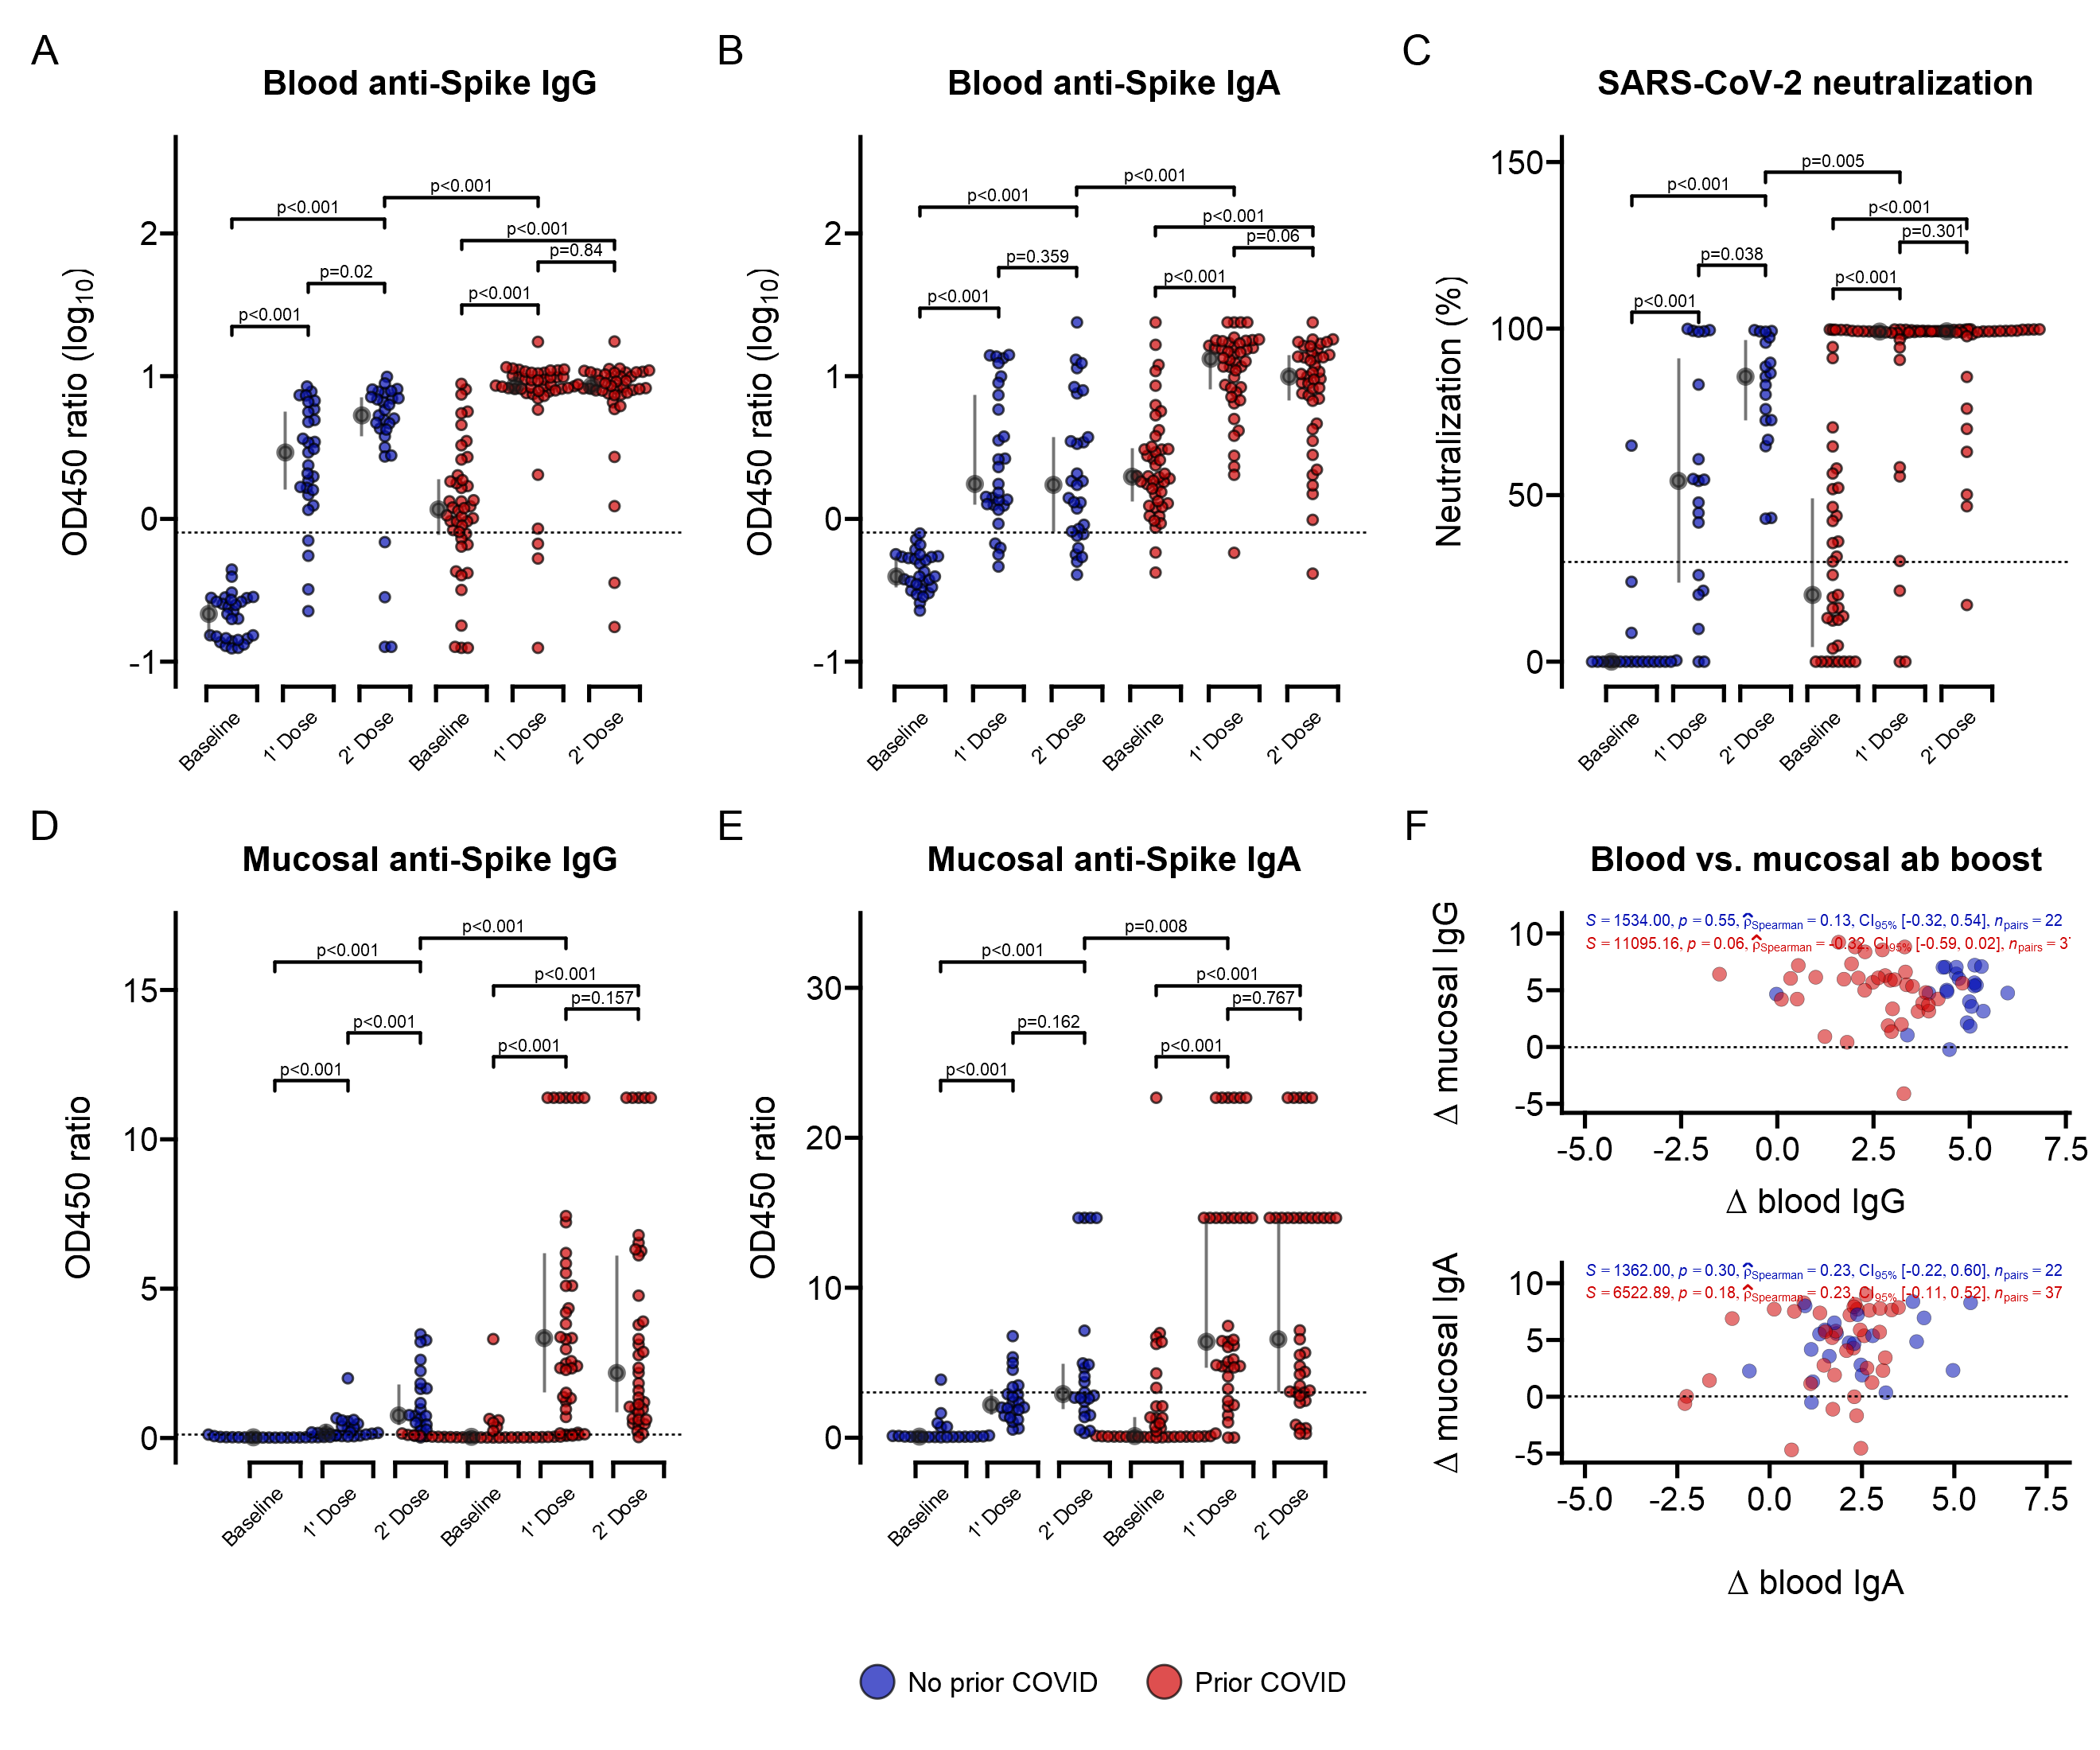

In [34]:
options(repr.plot.res = 220, repr.plot.width = 12, repr.plot.height = 10, warn = -1) # nolint

suppressWarnings({
  suppressMessages({
gg_fig <-
 p_igg + p_iga + p_ign + p_iggm + p_igam + p_corr +
 plot_layout(ncol = 3) +
  plot_annotation(tag_levels = "A")

  })
})
gg_fig

# Fig 5. Systemic cytokine and cellular changes associated with Sputnik-V vaccination. 

## Systemic cytokine 

Data preparation

In [50]:
db_cyto <- 
 db_all %>% 
  select(2, 59:181)

In [51]:
db_cyto_w <-
 db_cyto %>%
  pivot_longer(!`PRIOR COVID`, names_to = "VAR", values_to = "count") %>%
   separate(col = VAR, into = c("VAR", "GROUP"), sep = "_") %>%
    pivot_wider(names_from = VAR, values_from = count, values_fn = list) %>%
     unnest(cols = -c(`PRIOR COVID`, `GROUP`)) %>%
      mutate(GROUP = factor(GROUP,
                            levels = c("V1", "V2", "V3"),
                            labels = c("Baseline", "1' Dose", "2' Dose")
                            )
             )

In [52]:
markers <-
 db_cyto %>%
  select(ends_with("_V1")) %>%
   colnames() %>% 
    str_remove(pattern = "_V1") %>%
     sort(decreasing = T)

In [53]:
for (i in 1:length(markers)) { # nolint
  db_cyto[,paste0(markers[i],"_V2V1")] <- db_cyto[,paste0(markers[i],"_V2")] / db_cyto[,paste0(markers[i],"_V1")] # nolint
  db_cyto[,paste0(markers[i],"_V3V1")] <- db_cyto[,paste0(markers[i],"_V3")] / db_cyto[,paste0(markers[i],"_V1")] # nolint
}

In [54]:
db_v2v1 <-
 db_cyto %>%
  select(`PRIOR COVID`, ends_with("_V2V1")) %>%
   rename_all(~str_remove(., "_V2V1"))

db_v3v1 <-
 db_cyto %>%
  select(`PRIOR COVID`, ends_with("_V3V1")) %>%
   rename_all(~str_remove(., "_V3V1"))

geomean_v2v1 <-
 db_v2v1 %>%
  group_by(`PRIOR COVID`) %>%
   summarise(across(where(is.numeric), ~ psych::geometric.mean(.x, na.rm = TRUE))) %>% # nolint
    t() %>%
     data.frame() %>%
      rename(`No prior` = 1, Prior = 2) %>%
       slice(-1) %>%
        mutate_if(is.character,as.numeric) %>%
         rownames_to_column("ID") %>%
          pivot_longer(!ID, names_to = "GROUP", values_to = "geomean") %>%
           mutate(ID = str_replace(ID, " alpha", "alpha")) %>%
           mutate(ID = str_replace(ID, "alpha", "-alpha")) %>%
           mutate(ID = str_replace(ID, "beta", "-beta")) %>%
           mutate(ID = str_replace(ID, "--", "-")) %>%
            mutate(ID = case_when(
                               ID == "VEFG" ~ "VEGF",
                               ID == "TNF-beta" ~ "TNF-\u03b2",
                               ID == "TNF-alpha" ~ "TNF-\u03b1",
                               ID == "TGF-alpha" ~ "TGF-\u03b1",
                               ID == "MIP-1-beta" ~ "MIP-1-\u03b2",
                               ID == "MIP-1-alpha" ~ "MIP-1-\u03b1",
                               ID == "IL-1-beta" ~ "IL-1-\u03b2",
                               ID == "IL-1-alpha" ~ "IL-1-\u03b1",
                               ID == "IFN-gamma" ~ "IFN-\u03b3",
                               ID == "IFN-alpha2" ~ "IFN-\u03b12",
                               TRUE ~ ID
                   )) %>% 
             mutate(ID = factor(ID,
                                levels = c("VEGF",
                                           "TNF-\u03b2",
                                           "TNF-\u03b1",
                                           "TGF-\u03b1",
                                           "sCD40L", "RANTES",
                                           "PDGF-AB/BB",
                                           "PDGF-AA",
                                           "MIP-1-\u03b2",
                                           "MIP-1-\u03b1",
                                           "MDC", "MCP-3",
                                           "MCP-1",
                                           "IP-10",
                                           "IL-17A",
                                           "IL-15",
                                           "IL-13",
                                           "IL-12p70",
                                           "IL-12p40",
                                           "IL-10",
                                           "IL-9",
                                           "IL-8",
                                           "IL-7",
                                           "IL-6",
                                           "IL-5",
                                           "IL-4",
                                           "IL-3",
                                           "IL-2",
                                           "IL-1RA",
                                           "IL-1-\u03b2",
                                           "IL-1-\u03b1",
                                           "IFN-\u03b3",
                                           "IFN-\u03b12",
                                           "GRO",
                                           "GM-CSF",
                                           "G-CSF",
                                           "Fractalkine",
                                           "FLT-3L",
                                           "FGF-2",
                                           "Eotaxin",
                                           "EGF")
                                 )
                     )

geomean_v3v1 <-
 db_v3v1 %>%
  group_by(`PRIOR COVID`) %>%
   summarise(across(where(is.numeric), ~ psych::geometric.mean(.x, na.rm = TRUE))) %>% # nolint
    t() %>%
     data.frame() %>%
      rename(`No prior` = 1, Prior = 2) %>%
       slice(-1) %>%
        mutate_if(is.character,as.numeric) %>%
         rownames_to_column("ID") %>%
          pivot_longer(!ID, names_to = "GROUP", values_to = "geomean") %>%
           mutate(ID = str_replace(ID, " alpha", "alpha")) %>%
           mutate(ID = str_replace(ID, "alpha", "-alpha")) %>%
           mutate(ID = str_replace(ID, "beta", "-beta")) %>%
           mutate(ID = str_replace(ID, "--", "-")) %>%
            mutate(ID = case_when(
                               ID == "VEFG" ~ "VEGF",
                               ID == "TNF-beta" ~ "TNF-\u03b2",
                               ID == "TNF-alpha" ~ "TNF-\u03b1",
                               ID == "TGF-alpha" ~ "TGF-\u03b1",
                               ID == "MIP-1-beta" ~ "MIP-1-\u03b2",
                               ID == "MIP-1-alpha" ~ "MIP-1-\u03b1",
                               ID == "IL-1-beta" ~ "IL-1-\u03b2",
                               ID == "IL-1-alpha" ~ "IL-1-\u03b1",
                               ID == "IFN-gamma" ~ "IFN-\u03b3",
                               ID == "IFN-alpha2" ~ "IFN-\u03b12",
                               TRUE ~ ID
                   )) %>% 
             mutate(ID = factor(ID,
                                levels = c("VEGF",
                                           "TNF-\u03b2",
                                           "TNF-\u03b1",
                                           "TGF-\u03b1",
                                           "sCD40L", "RANTES",
                                           "PDGF-AB/BB",
                                           "PDGF-AA",
                                           "MIP-1-\u03b2",
                                           "MIP-1-\u03b1",
                                           "MDC", "MCP-3",
                                           "MCP-1",
                                           "IP-10",
                                           "IL-17A",
                                           "IL-15",
                                           "IL-13",
                                           "IL-12p70",
                                           "IL-12p40",
                                           "IL-10",
                                           "IL-9",
                                           "IL-8",
                                           "IL-7",
                                           "IL-6",
                                           "IL-5",
                                           "IL-4",
                                           "IL-3",
                                           "IL-2",
                                           "IL-1RA",
                                           "IL-1-\u03b2",
                                           "IL-1-\u03b1",
                                           "IFN-\u03b3",
                                           "IFN-\u03b12",
                                           "GRO",
                                           "GM-CSF",
                                           "G-CSF",
                                           "Fractalkine",
                                           "FLT-3L",
                                           "FGF-2",
                                           "Eotaxin",
                                           "EGF")
                                 )
                     )

**A) Blood cytokine changes represented as the geometric mean of fold change of each cytokine post-vaccination (after Dose 1' and 2') over pre-vaccination level in the No Prior and Prior COVID-19 groups.** 

Cytokines were plotted in alphabetical order 

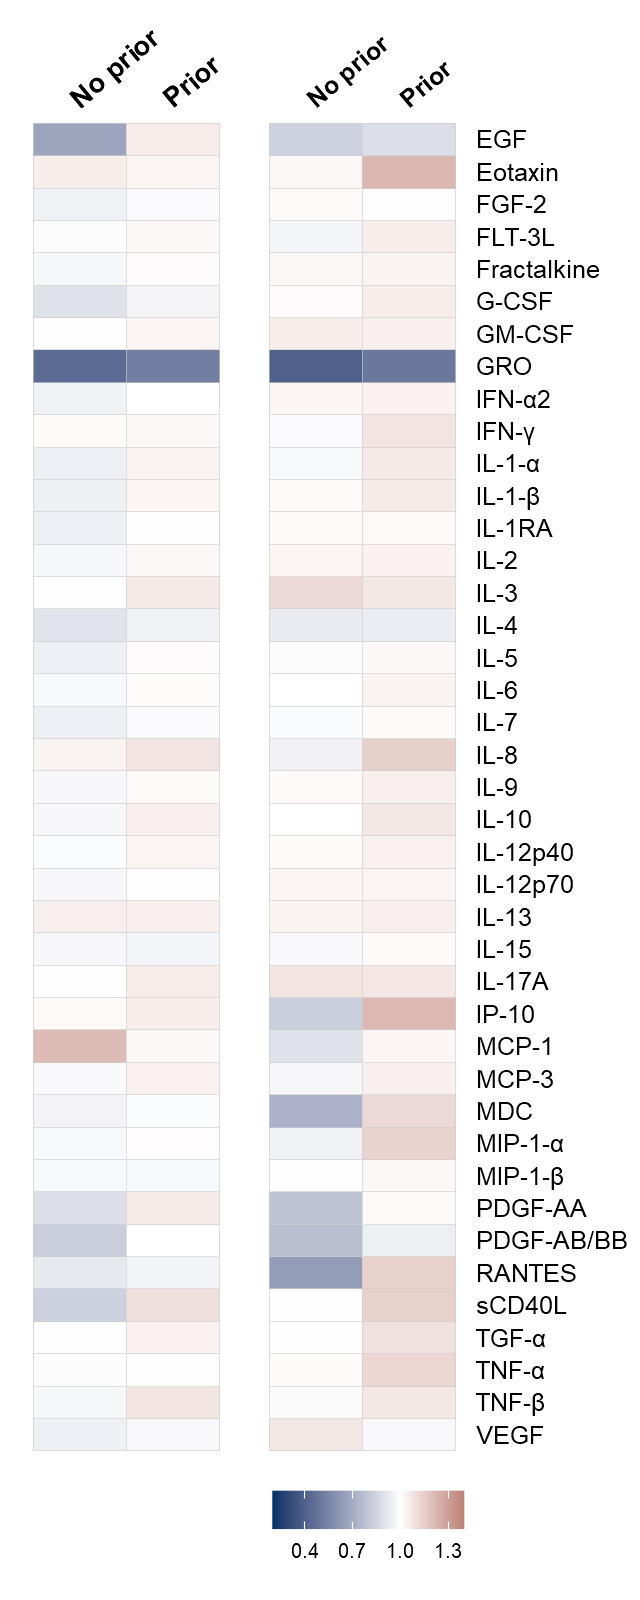

In [55]:
options(repr.plot.width = 4, repr.plot.height = 10,  repr.plot.res = 160)

gg_fig <-
 geomean_v2v1 %>%
  ggplot() +
  aes(x = GROUP, y = ID, fill = geomean, label = round(geomean, 2)) +
  geom_tile(size = .1, color = "gray80", stat = "identity") +
# geom_text(aes(hjust=0.5),size = 2, color = "gray10", stat="identity", fontface = "italic") + # nolint
  scale_fill_gradient2(low = "#003366", mid = "#ffffff", high = "#660000", midpoint = 1, breaks = seq(0.1, 1.5, 0.3), limits = c(0.2, 1.4)) + # nolint
  scale_x_discrete(position = "top") +
  scale_y_discrete(position = "right") +
# labs(title = "21 day",
#      subtitle = "post 1 shot" # nolint
#      ) +

  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_rect(fill = NA, color = NA, size = 0.5, linetype = "solid"), # nolint
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        panel.background = element_rect(fill = NA),
        plot.background = element_rect(fill = NA),
        legend.position = "none",
        axis.text = element_text(color = "#000000", size = 12, face = "bold"),
        axis.text.x = element_text(angle = 40, vjust = 0, hjust = 0),
        axis.text.y = element_blank(),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        plot.title = element_text(hjust = 0.5, size = 16),
        plot.subtitle = element_text(hjust = 0.5, size = 14)
        ) |

geomean_v3v1 %>%
 ggplot() +
  aes(x = GROUP, y = ID, fill = geomean, label = round(geomean, 2)) +
  geom_tile(size = .1, color = "gray80", stat = "identity") +
# geom_text(aes(hjust=0.5),size = 2, color = "gray10", stat="identity", fontface = "italic") + # nolint
  scale_fill_gradient2(low = "#003366", mid = "#ffffff", high = "#660000", midpoint = 1, breaks = seq(0.1, 1.5, 0.3), limits = c(0.2, 1.4)) + # nolint
  scale_x_discrete(position = "top") +
  scale_y_discrete(position = "right") +
# labs(title = "42 day",
#     subtitle = "post 1 shot" # nolint
#     ) +

  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_rect(fill = NA, color = NA, size = 0.5, linetype = "solid"), # nolint
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        panel.background = element_rect(fill = NA),
        plot.background = element_rect(fill = NA),
        legend.position = "bottom",
        axis.text = element_text(color = "#000000", size = 11, face = "bold"),
        axis.text.x = element_text(angle = 40, vjust = 0, hjust = 0),
        axis.text.y = element_text(face = "plain"),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        plot.title = element_text(hjust = 0.5, size = 16),
        plot.subtitle = element_text(hjust = 0.5, size = 14)
        ) +
   labs(fill = '')

gg_fig

## Full blood counts (FBC)

Data preparation

In [56]:
db_blood <-
 db_all %>%
  select(2, 182:220) # nolint

In [57]:
db_blood_w <-
 db_blood %>%
  pivot_longer(!`PRIOR COVID`, names_to = "VAR", values_to = "count") %>%
   separate(col = VAR, into = c("VAR", "GROUP"), sep = "_") %>%
    pivot_wider(names_from = VAR, values_from = count, values_fn = list) %>%
     unnest(cols=-c(`PRIOR COVID`, `GROUP`)) %>% # nolint
      mutate(GROUP = factor(GROUP,
                            levels = c("V1", "V2", "V3"),
                            labels = c("Baseline", "1' Dose", "2' Dose")
                            )
            )

In [58]:
blood_markers <- c("GRAN", "LYMPH", "WBC", "PLT", "RBC")

db_blood_h <-
 db_blood  %>%
  select(c(`PRIOR COVID`, contains(blood_markers)))

In [59]:
for(i in 1:length(blood_markers)) { # nolint
  db_blood_h[,paste0(blood_markers[i], "_V2V1")] <- db_blood_h[,paste0(blood_markers[i], "_V2")]/db_blood_h[,paste0(blood_markers[i], "_V1")] # nolint
  db_blood_h[,paste0(blood_markers[i], "_V3V1")] <- db_blood_h[,paste0(blood_markers[i], "_V3")]/db_blood_h[,paste0(blood_markers[i], "_V1")] # nolint
}

In [60]:
db_v2v1 <-
 db_blood_h %>%
  select(`PRIOR COVID`, ends_with("_V2V1")) %>%
   rename_all(~str_remove(., "_V2V1"))

db_v3v1 <-
 db_blood_h %>%
  select(`PRIOR COVID`, ends_with("_V3V1")) %>%
   rename_all(~str_remove(., "_V3V1"))

geomean_v2v1 <-
 db_v2v1 %>%
  group_by(`PRIOR COVID`) %>%
   summarise(across(where(is.numeric), ~ psych::geometric.mean(.x, na.rm = TRUE))) %>% # nolint
    t() %>%
     data.frame() %>%
      rename(`No prior` = 1, Prior = 2) %>%
       slice(-1) %>%
        mutate_if(is.character,as.numeric) %>%
         rownames_to_column("ID") %>%
          pivot_longer(!ID, names_to = "GROUP", values_to = "geomean") %>%
           arrange(desc(ID)) %>%
            mutate(ID = factor(ID, levels = unique(ID)))


geomean_v3v1 <-
 db_v3v1 %>%
  group_by(`PRIOR COVID`) %>%
   summarise(across(where(is.numeric), ~ psych::geometric.mean(.x, na.rm = TRUE))) %>% # nolint
    t() %>%
     data.frame() %>%
      rename(`No prior` = 1, Prior = 2) %>%
       slice(-1) %>%
        mutate_if(is.character,as.numeric) %>%
         rownames_to_column("ID") %>%
          pivot_longer(!ID, names_to = "GROUP", values_to = "geomean") %>%
           arrange(desc(ID)) %>%
            mutate(ID = factor(ID, levels = unique(ID)))

**C) Changes in full blood counts (FBC) represented as the geometric mean of fold change of each cell sub-type post-vaccination (after Dose 1' and 2') over pre-vaccination count.**

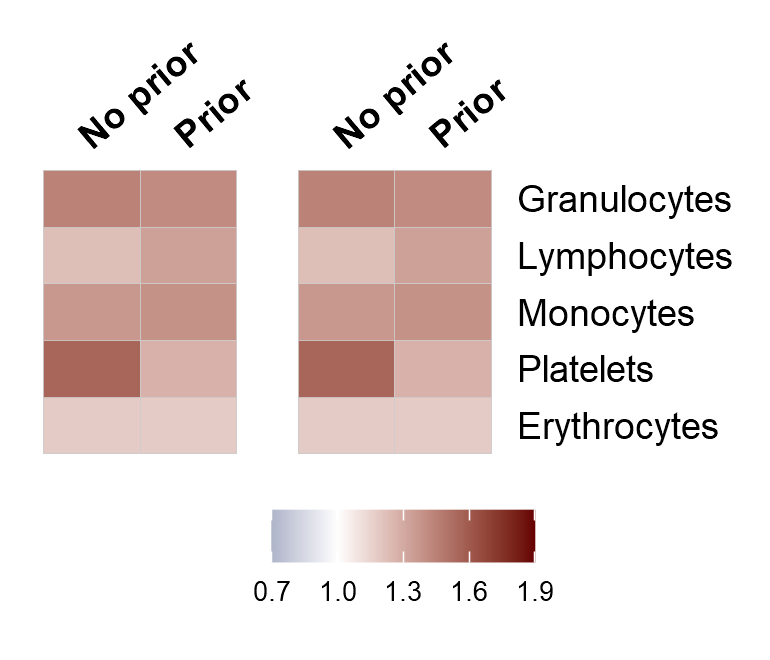

In [61]:
options(repr.plot.width = 3.5, repr.plot.height = 3,  repr.plot.res = 220)

gg_fig <-
 geomean_v2v1 %>%
  mutate(ID = case_when(
    ID == "GRAN"  ~ "Granulocytes",
    ID == "LYMPH" ~ "Lymphocytes",
    ID == "WBC"   ~ "Monocytes",
    ID == "PLT"   ~ "Platelets",
    ID == "RBC"   ~ "Erythrocytes"
                        )
         ) %>%
   mutate(ID = factor(ID,
                      levels = rev(c("Granulocytes", "Lymphocytes", "Monocytes", "Platelets", "Erythrocytes"))) # nolint
          ) %>%
  ggplot() +
   aes(x = GROUP, y = ID, fill = geomean) +
   geom_tile(size = .1, color = "gray80", stat = "identity") +
   scale_fill_gradient2(low = "#003366", mid = "#ffffff", high = "#660000", midpoint = 1, breaks = seq(0.7, 1.9, 0.3), limits = c(0.7, 1.9))+ # nolint
   scale_x_discrete(position = "top") +
   scale_y_discrete(position = "right") +
#  labs(title = "21 day",
#       subtitle = "post 1 shot") +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_rect(fill = NA, color = NA, size = 0.5,linetype = "solid"), # nolint
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        panel.background = element_rect(fill = NA),
        plot.background = element_rect(fill = NA),
        legend.position = "none",
        axis.text = element_text(color = "#000000", size = 12, face = "bold"),
        axis.text.y = element_blank(),
        axis.text.x = element_text(angle = 40, vjust = 0, hjust = 0),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        plot.title = element_text(hjust = 0.5, size = 16),
        plot.subtitle = element_text(hjust = 0.5, size = 14)
        )  |
 geomean_v2v1 %>%
  mutate(ID = case_when(
    ID == "GRAN"  ~ "Granulocytes",
    ID == "LYMPH" ~ "Lymphocytes",
    ID == "WBC"   ~ "Monocytes",
    ID == "PLT"   ~ "Platelets",
    ID == "RBC"   ~ "Erythrocytes"
                        )
         ) %>%
   mutate(ID = factor(ID,
                      levels = rev(c("Granulocytes", "Lymphocytes", "Monocytes", "Platelets", "Erythrocytes"))) # nolint
          ) %>%
  ggplot() +
  aes(x = GROUP, y = ID, fill = geomean) +
  geom_tile(size = .1, color = "gray80", stat = "identity") +
  scale_fill_gradient2(low = "#003366", mid = "#ffffff", high = "#660000", midpoint = 1, breaks = seq(0.7, 1.9, 0.3), limits = c(0.7, 1.9))+ # nolint
  scale_x_discrete(position = "top") +
  scale_y_discrete(position = "right") +
#  labs(title = "42 day",
#       subtitle = "post 1 shot") +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_rect(fill = NA, color = NA, size = 0.5, linetype = "solid"), # nolint
        axis.line = element_blank(),
        axis.ticks = element_blank(),
        panel.background = element_rect(fill = NA),
        plot.background = element_rect(fill = NA),
        legend.position = "bottom",
        axis.text = element_text(color = "black", size = 12, face = "bold"),
        axis.text.y = element_text(face = "plain"),
        axis.text.x = element_text(angle = 40, vjust = 0, hjust = 0),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        plot.title = element_text(hjust = 0.5, size = 16),
        plot.subtitle = element_text(hjust = 0.5, size = 14)
        ) +
   labs(fill = '')

gg_fig


# References

Analyses were conducted using the R Statistical language (version 4.1.2; R Core Team, 2021) on Windows 10 x64 (build 22000), using the packages ggsignif (version 0.6.3; Ahlmann-Eltze et al., 2021), ggalt (version 0.6.2; Bob Rudis et al., 2021), ggprism (version 1.0.3; Charlotte Dawson, 2021), flextable (version 0.6.11.4; David Gohel, 2021), officer (version 0.4.1; David Gohel, 2021), officedown (version 0.2.3; David Gohel and Noam Ross, 2021), gghalves (version 0.1.1.9000; Frederik Tiedemann, 2021), ggplot2 (version 3.3.5.9000; Wickham. ggplot2: Elegant Graphics for Data Analysis. Springer-Verlag New York, 2016.), stringr (version 1.4.0; Hadley Wickham, 2019), forcats (version 0.5.1; Hadley Wickham, 2021), tidyr (version 1.1.4; Hadley Wickham, 2021), scales (version 1.1.1.9000; Hadley Wickham and Dana Seidel, 2021), readr (version 2.1.1; Hadley Wickham, Jim Hester and Jennifer Bryan, 2021), dplyr (version 1.0.7; Hadley Wickham et al., 2021), DescrTab2 (version 2.1.8; Jan Meis et al., 2021), ggalluvial (version 0.12.3; Jason Cory Brunson and Quentin Read,), magick (version 2.7.3; Jeroen Ooms, 2021), ggside (version 0.2.0; Justin Landis, 2021), ggrepel (version 0.9.1.9999; Kamil Slowikowski, 2021), PCAtools (version 2.6.0; Kevin Blighe and Aaron Lun, 2021), tibble (version 3.1.6; Kirill Muller and Hadley Wickham, 2021), purrr (version 0.3.4; Lionel Henry and Hadley Wickham, 2020), report (version 0.4.0.1; Makowski et al., 2020), ggstatsplot (version 0.9.0.9000; Patil, 2021), repr (version 1.1.4; Philipp Angerer, Thomas Kluyver and Jan Schulz, 2022), gt (version 0.3.1; Richard Iannone, Joe Cheng and Barret Schloerke, 2021), ggstar (version 1.0.3; Shuangbin Xu, 2021), gtsummary (version 1.5.0.9018; Sjoberg DD, Whiting K, Curry M, Lavery JA, Larmarange Reproducible summary tables with the gtsummary package. The R Journal 2021;13:570–80. https://doi.org/10.32614/RJ-2021-053.), patchwork (version 1.1.1; Thomas Lin Pedersen, 2020), tidyverse (version 1.3.1.9000; Wickham et al., 2019) and DT (version 0.20.1; Yihui Xie, Joe Cheng and Xianying Tan, 2021).

References
----------
  - Ahlmann-Eltze, C., & Patil, I. (2021). ggsignif: R Package for Displaying Significance Brackets for 'ggplot2'. PsyArxiv. doi:10.31234/osf.io/7awm6
  - Bob Rudis, Ben Bolker, Jan Schulz, Aditya Kothari and Jonathan Sidi (2021). ggalt: Extra Coordinate Systems, 'Geoms', Statistical Transformations, Scales and Fonts for 'ggplot2'. R package version 0.6.2. https://github.com/hrbrmstr/ggalt
  - Charlotte Dawson (2021). ggprism: A 'ggplot2' Extension Inspired by 'GraphPad Prism'. R package version 1.0.3. https://CRAN.R-project.org/package=ggprism
  - David Gohel (2021). flextable: Functions for Tabular Reporting. https://ardata-fr.github.io/flextable-book/, https://davidgohel.github.io/flextable/.
  - David Gohel (2021). officer: Manipulation of Microsoft Word and PowerPoint Documents. R package version 0.4.1. https://CRAN.R-project.org/package=officer
  - David Gohel and Noam Ross (2021). officedown: Enhanced 'R Markdown' Format for 'Word' and 'PowerPoint'. https://ardata-fr.github.io/officeverse/, https://davidgohel.github.io/officedown/.
  - Frederik Tiedemann (2021). gghalves: Compose Half-Half Plots Using Your Favourite Geoms. R package version 0.1.1.9000. https://github.com/erocoar/gghalves
  - H. Wickham. ggplot2: Elegant Graphics for Data Analysis. Springer-Verlag New York, 2016.
  - Hadley Wickham (2019). stringr: Simple, Consistent Wrappers for Common String Operations. R package version 1.4.0. https://CRAN.R-project.org/package=stringr
  - Hadley Wickham (2021). forcats: Tools for Working with Categorical Variables (Factors). R package version 0.5.1. https://CRAN.R-project.org/package=forcats
  - Hadley Wickham (2021). tidyr: Tidy Messy Data. R package version 1.1.4. https://CRAN.R-project.org/package=tidyr
  - Hadley Wickham and Dana Seidel (2021). scales: Scale Functions for Visualization. https://scales.r-lib.org, https://github.com/r-lib/scales.
  - Hadley Wickham, Jim Hester and Jennifer Bryan (2021). readr: Read Rectangular Text Data. R package version 2.1.1. https://CRAN.R-project.org/package=readr
  - Hadley Wickham, Romain Francois, Lionel Henry and Kirill Muller (2021). dplyr: A Grammar of Data Manipulation. R package version 1.0.7. https://CRAN.R-project.org/package=dplyr
  - Jan Meis, Lukas Baumann, Maximilian Pilz and Lukas Sauer (2021). DescrTab2: Publication Quality Descriptive Statistics Tables. R package version 2.1.8. https://imbi-heidelberg.github.io/DescrTab2/
  - Jason Cory Brunson and Quentin D. Read (). ggalluvial: Alluvial Plots in 'ggplot2'. R package version 0.12.3. http://corybrunson.github.io/ggalluvial/
  - Jeroen Ooms (2021). magick: Advanced Graphics and Image-Processing in R. R package version 2.7.3. https://CRAN.R-project.org/package=magick
  - Justin Landis (2021). ggside: Side Grammar Graphics. R package version 0.2.0. https://github.com/jtlandis/ggside
  - Kamil Slowikowski (2021). ggrepel: Automatically Position Non-Overlapping Text Labels with 'ggplot2'. R package version 0.9.1.9999. https://github.com/slowkow/ggrepel
  - Kevin Blighe and Aaron Lun (2021). PCAtools: PCAtools: Everything Principal Components Analysis. R package version 2.6.0. https://github.com/kevinblighe/PCAtools
  - Kirill Muller and Hadley Wickham (2021). tibble: Simple Data Frames. R package version 3.1.6. https://CRAN.R-project.org/package=tibble
  - Lionel Henry and Hadley Wickham (2020). purrr: Functional Programming Tools. R package version 0.3.4. https://CRAN.R-project.org/package=purrr
  - Makowski, D., Ben-Shachar, M.S., Patil, I. & Ludecke, D. (2020). Automated Results Reporting as a Practical Tool to Improve Reproducibility and Methodological Best Practices Adoption. CRAN. Available from https://github.com/easystats/report. doi: .
  - Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach. Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167
  - Philipp Angerer, Thomas Kluyver and Jan Schulz (2022). repr: Serializable Representations. R package version 1.1.4. https://CRAN.R-project.org/package=repr
  - R Core Team (2021). R: A language and environment for statistical computing. R Foundation for Statistical Computing, Vienna, Austria. URL https://www.R-project.org/.
  - Richard Iannone, Joe Cheng and Barret Schloerke (2021). gt: Easily Create Presentation-Ready Display Tables. R package version 0.3.1. https://CRAN.R-project.org/package=gt
  - Shuangbin Xu (2021). ggstar: Multiple Geometric Shape Point Layer for 'ggplot2'. R package version 1.0.3. https://github.com/xiangpin/ggstar/
  - Sjoberg DD, Whiting K, Curry M, Lavery JA, Larmarange J. Reproducible summary tables with the gtsummary package. The R Journal 2021;13:570–80. https://doi.org/10.32614/RJ-2021-053.
  - Thomas Lin Pedersen (2020). patchwork: The Composer of Plots. R package version 1.1.1. https://CRAN.R-project.org/package=patchwork
  - Wickham et al., (2019). Welcome to the tidyverse. Journal of Open Source Software, 4(43), 1686, https://doi.org/10.21105/joss.01686
  - Yihui Xie, Joe Cheng and Xianying Tan (2021). DT: A Wrapper of the JavaScript Library 'DataTables'. R package version 0.20.1. https://github.com/rstudio/DT

## Appendix

Median_IQR function

In [65]:
median_IQR <- function(x) { # nolint
  data.frame(y = median(x), # Median
             ymin = quantile(x)[2], # 1st quartile
             ymax = quantile(x)[4])  # 3rd quartile
}